# STAT 207 Project 01 - Asteroid Data Cleaning and Analysis

Victor Liu

## 1. Introduction

The reason why I wanted to explore this data is because it's a catalogue of the majority of asteroids identified by humanity which allows us to see which ones are close to Earth and/or which ones could potentially collide with Earth in the future. We can also see how asteroids that do potentially pose a hazard of collision with the Earth relate to each other and observe any similarities. Astronomers and astrophysicists would definitely find those results useful as they could, depending on how long until a collision and how severely the impact would affect humanity, properly warn authorities of an impending collision event and give guidance regarding potential solutions to such a problem. While it's already been predicted that no big asteroids will hit the Earth for the next 100 years, looking farther into the future will still be very meaningful just for humanity in general.

Some research questions that I wanted to answer was if there was a relationship between:

- Absolute magnitude (H) and potentially hazardous asteroid (pha) status
- Diameter (diameter) and an asteroid's near earth object (neo) status
- Perihelion distance (q) and moid (moid) and if it relates to an asteroid's near earth object (neo) status
- Absolute magnitude (H) and moid (moid)/diameter (diameter) and if it relates to an asteroid's near earth object (neo) status
- Absolute magnitude (H) and asteroid orbit class (class) and if it relates to an asteroid's potentially hazardous asteroid (pha) status
- Perihelion distance (q) and orbital eccentricity (e) and if it relates to an asteroid's near earth object (neo) status/orbit class (class)

The answers to these questions can help astronomers and astrophysicists better identify characteristics of potentially hazardous asteroids as new asteroids are cataloged and information about previously discovered asteroids is updated.

In [2]:
#Imports here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(25, 10)})

## 2. Dataset Discussion

For this project I used a dataset (https://www.kaggle.com/datasets/sakhawat18/asteroid-dataset) from Kaggle containing information regarding numerous asteroids that have been discovered by astronomers all over the world. The original data is officially maintained by the Jet Propulsion Laboratory of California Institute of Technology, an organization under NASA, on its database search engine (https://ssd.jpl.nasa.gov/tools/sbdb_query.html) and has been transferred to Kaggle by an astronomy and astrophysics researcher. The Kaggle dataset is generally updated weekly as a result of new information/data gathered regarding any of the asteroids listed so there are numerous versions of the dataset that have been made and will be made in the future. As of the start of this project (2/14/2024), I'm using Version 186 of the data, part of which is shown below.

In [3]:
asteroid = pd.read_csv("asteroids.csv", low_memory=False)
asteroid.head(10)

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
5,a0000006,2000006,6 Hebe,6,Hebe,NaN,N,N,5.80,185.180,...,2.191800e-06,1.122100e-05,1.300600e-05,7.392200e-06,3.306700e-09,4.438800e-10,2.875400e-05,2.344500e-06,MBA,0.41032
6,a0000007,2000007,7 Iris,7,Iris,NaN,N,N,5.60,199.830,...,2.582500e-06,2.641200e-05,2.707500e-05,7.014700e-06,2.469500e-09,3.370100e-10,2.662700e-05,1.699400e-06,MBA,0.38128
7,a0000008,2000008,8 Flora,8,Flora,NaN,N,N,6.50,147.491,...,3.240300e-06,2.432000e-05,2.664600e-05,1.209200e-05,2.668100e-09,4.746200e-10,4.018700e-05,1.876500e-06,MBA,0.54186
8,a0000009,2000009,9 Metis,9,Metis,NaN,N,N,6.30,190.000,...,2.007400e-06,2.417000e-05,2.600800e-05,1.036600e-05,3.470200e-09,5.192700e-10,3.870700e-05,2.614600e-06,MBA,0.44895
9,a0000010,2000010,10 Hygiea,10,Hygiea,NaN,N,N,5.50,407.120,...,2.173400e-06,2.855200e-05,3.023700e-05,1.124600e-05,7.699800e-09,5.847400e-10,6.482900e-05,6.724400e-06,MBA,0.53434


In [4]:
asteroid.shape

(958524, 45)

The unit of observation of this data would be asteroid, as each row corresponds to each asteroid's ids, designation, name, and other descriptive characteristics.

This type of data, although large, is still a sample of all asteroids known and identified by humanity which is over one million. The data is likely representative as the large majority (958,524 out of approximately 1.3 million) of all identified asteroids are catalogued here with varying degrees of knowledge about their characteristics. 

While the majority of the data in the dataset is collected by NASA funded observatories and projects through radar astrometry, lots of data also come from various observatories around the world as well as amateur astronomers. Radar astrometry is the technique of transmitting radio waves or microwaves into space and reflecting them off objects and then analyzing the reflections after receiving them again. The data is also collected by various spacecraft and space telescopes.

I intend on exploring the data using the full name of asteroid (full_name), near earth object (neo), potentially hazardous asteroid (pha), absolute magnitude (H), diameter in km (diameter), orbital eccentricity (e), perihelion distance in AU (q), earth minimum orbit intersection distance in AU (moid), and class of asteroid (class) variables. 

I'll briefly explain what each variable means before diving into the data cleaning and analysis so it's easier to understand my research question and results. Briefly explaining what an astronomical unit means, 1 AU is the average distance between the Earth and the Sun which is about 93 million miles or about 150 million kilometers. Continuing on, the first three variables should be easy enough to understand conceptually. Next up, absolute magnitude is a value that an observer would record if the asteroid was placed 1 AU away from the Earth and the sun at a zero phase angle, or an angle which all three objects exist on the same line (Sun and Earth would overlap in space). This is important because the absolute magnitude allows astronomers to compare the inherent brightness of objects regardless of their actual distance from Earth. Asteroids, among other celestial objects, don't produce their own light and instead reflect light. How well an asteroid reflects light should depend on its size and how pale it is. The less light reflected, the greater the value, the more light reflected, the smaller the value. The absolute value can be negative but among asteroids that's fairly uncommon. This absolute magnitude scale is specific to smaller celestial bodies such as asteroids and planets as other larger celestial and deep space objects have their own absolute magnitude scale that uses the same idea but with larger numbers. Orbital eccentricity is how circular or elliptical an asteroid's orbit is. An e of 0 means the orbit is a perfect circle, between 0 and 1 means the orbit is elliptical, at 1 the orbit actually becomes an escape trajectory that is parabolic, and greater than 1 means that the escape trajectory is hyperbolic. The perihelion is the point in an object's orbit in which it is closest to sun so the perihelion distance would just be a quantitative measure of how far the object is at that point. The minimum orbit intersection distance is the distance between the closest points of the osculating orbits (orbit if there isn't anything influencing either orbit) of two bodies. The moid in this case is specifically the earth moid because we want to know the closest an asteroid can get to earth so that we can determine if its potentially hazardous or not. Class in this case means orbit class as there are asteroid elemental composition classes as well. 

Some limitations in the data include the fact that we may not know the exact values for some of the characteristics of asteroids listed in the dataset. There are a quite a few columns dedicated to just listening the uncertainty for many measurements. At the end of the day, many values in the dataset will just be our very best guesses using the best of current technology. Even still, some characteristics of certain asteroids in this dataset may be missing because scientists and researchers are still in the process of measuring and/or calculating them or because they still can't be determined using current methods and/or technology. Even though the dataset is large, it still doesn't contain every identified asteroid which, according to the JPL home website (https://ssd.jpl.nasa.gov), is 1,349,113 as of (2/13/2024) and will continue to increase with time. There are certainly a lot of variables in the dataset but a personal limitation of mine would be understanding what all the variables mean. I don't have the adequate knowledge to fully appreciate, understand, and use every single variable in the data for analysis so I'm only using the variables that I'm interested in and understand. Due to my limited understanding of the data, I can't tell if there is meaningful information about the asteroids that isn't included or suggest any useful information to add to the dataset about each asteroid.

## 3. Dataset Cleaning

I'll just be limiting the number of variables to those that I described in the Dataset Discussion section and go from there.

In [5]:
asteroids = asteroid[["full_name", "neo", "pha", "H", "diameter", "e", "q", "moid", "class"]]
asteroids

,full_name,neo,pha,H,diameter,e,q,moid,class
0,1 Ceres,N,N,3.400,939.400,0.076009,2.558684,1.594780,MBA
1,2 Pallas,N,N,4.200,545.000,0.229972,2.135935,1.234290,MBA
2,3 Juno,N,N,5.330,246.596,0.256936,1.982706,1.034290,MBA
3,4 Vesta,N,N,3.000,525.400,0.088721,2.151909,1.139480,MBA
4,5 Astraea,N,N,6.900,106.699,0.190913,2.082619,1.095750,MBA
...,...,...,...,...,...,...,...,...,...
958519,(6013 P-L),N,N,17.135,NaN,0.185919,1.856807,0.861979,MBA
958520,(6331 P-L),N,N,18.500,NaN,0.282920,1.674319,0.671242,MBA
958521,(6344 P-L),Y,Y,20.400,NaN,0.662446,0.950941,0.035589,APO
958522,(2060 T-2),N,N,18.071,NaN,0.202053,1.893638,0.893896,MBA


All the python variable types seem to match their conceptual variable types.

In [6]:
asteroids.dtypes

full_name     object
neo           object
pha           object
H            float64
diameter     float64
e            float64
q            float64
moid         float64
class         object
dtype: object

Checking to see the number of missing values recognized by Python in each of the variables selected.

In [7]:
asteroids.isna().sum()

full_name         0
neo               4
pha           19921
H              6263
diameter     822315
e                 0
q                 0
moid          19921
class             0
dtype: int64

Looking for any missing values that might have been missed by Python. It's highly unlikely that a dataset maintained and curated by JPL will have many errors in data recording but I can quickly check for unique values in the neo and pha variables. I can't get anything useful out of value_counts for the numerical variables like H, diameter, e, q, and moid because there are just so many values so I can't really tell if there's anything out of the ordinary. Looking in depth to try and find potential implicit missing values for the numerical data would take up a significant amount of time. Given that the Python and conceptual variable types do match, I'll make the assumption that there are no implicit missing values across all variables listed in the dataframe.

In [8]:
asteroids["neo"].unique()

array(['N', 'Y', nan], dtype=object)

In [9]:
asteroids["pha"].unique()

array(['N', 'Y', nan], dtype=object)

In [10]:
asteroids['H'].value_counts()

H
16.800    28602
16.900    28515
16.700    28273
17.000    28029
16.600    27969
          ...  
15.570        1
24.185        1
23.843        1
23.349        1
26.419        1
Name: count, Length: 9489, dtype: int64

In [11]:
asteroids['diameter'].value_counts()

diameter
3.296     45
4.017     45
3.122     44
3.008     44
3.537     44
          ..
11.811     1
14.360     1
13.164     1
32.471     1
1.077      1
Name: count, Length: 16591, dtype: int64

In [12]:
asteroids['e'].value_counts()

e
0.203705    2
0.133513    2
0.077700    2
0.160752    2
0.000000    2
           ..
0.205891    1
0.225414    1
0.154831    1
0.142016    1
0.258348    1
Name: count, Length: 958444, dtype: int64

In [13]:
asteroids['q'].value_counts()

q
1.944165    2
1.854368    2
2.681553    2
1.923269    2
3.002643    2
           ..
2.102744    1
1.963056    1
2.072707    1
1.938656    1
1.676433    1
Name: count, Length: 958509, dtype: int64

In [14]:
asteroids['moid'].value_counts()

moid
1.168390    25
1.003580    25
1.239140    24
1.063400    22
1.171750    22
            ..
0.822216     1
0.871770     1
0.580962     1
0.762083     1
0.680220     1
Name: count, Length: 314300, dtype: int64

In [15]:
asteroids['class'].value_counts()

class
MBA    855954
OMB     28355
IMB     20360
MCA     18685
APO     12687
AMO      8457
TJN      8221
TNO      3468
ATE      1729
CEN       506
AST        76
IEO        22
HYA         4
Name: count, dtype: int64

I plan on dropping all NaN values for variables neo, pha, H, and moid. In total 26,187 values were dropped by looking at the number of rows before and after, which is 0.02732 or around 2.732% of the sample. Since this is a relatively small amount of the sample, removing those data points shouldn't greatly impact the results of my analysis. The reason I chose not to remove any of the diameter NaNs is because a vast majority of the sample is missing diameter values. I also chose not to use data imputation for those missing values because I'd be using a relatively small proportion of the dataset to substitute all the NaN's with which could have underlying affects on my analysis. In conclusion, I don't think the results I get from using the remaining diameter values in analysis will be applicable to the entire sample or population of interest.

In [16]:
asteroids_clean = asteroids.dropna(subset=["pha", "neo", "H"])
asteroids_clean

,full_name,neo,pha,H,diameter,e,q,moid,class
0,1 Ceres,N,N,3.400,939.400,0.076009,2.558684,1.594780,MBA
1,2 Pallas,N,N,4.200,545.000,0.229972,2.135935,1.234290,MBA
2,3 Juno,N,N,5.330,246.596,0.256936,1.982706,1.034290,MBA
3,4 Vesta,N,N,3.000,525.400,0.088721,2.151909,1.139480,MBA
4,5 Astraea,N,N,6.900,106.699,0.190913,2.082619,1.095750,MBA
...,...,...,...,...,...,...,...,...,...
958519,(6013 P-L),N,N,17.135,NaN,0.185919,1.856807,0.861979,MBA
958520,(6331 P-L),N,N,18.500,NaN,0.282920,1.674319,0.671242,MBA
958521,(6344 P-L),Y,Y,20.400,NaN,0.662446,0.950941,0.035589,APO
958522,(2060 T-2),N,N,18.071,NaN,0.202053,1.893638,0.893896,MBA


There are only missing values for diameter now.

In [17]:
asteroids_clean.isna().sum()

full_name         0
neo               0
pha               0
H                 0
diameter     800292
e                 0
q                 0
moid              0
class             0
dtype: int64

From the two categorical variable (full_name and class, as neo and pha should be boolean/logical), there are no uncommon values as all categories in full_name are the individual asteroid classifications and all categories in class are real asteroid orbit classes according to University of Maryland object classifications (https://pdssbn.astro.umd.edu/data_other/objclass.shtml). 

Briefly going through all asteroid orbit class conceptual definitions as a supplement to the website descriptions above.

In total 13 asteroid orbit classes are listed: MBA, OMB, IMB, MCA, APO, AMO, TJN, TNO, ATE, CEN, AST, IEO, and HYA.
- MBA (Main-Belt Asteroid) - Asteroids in the middle of the main asteroid belt between Mars and Jupiter
- OMB (Outer Main-Belt Asteroid) - Asteroids in the outer edge of the main asteroid belt between Mars and Jupiter
- IMB (Inner Main-Belt Asteroid) - Asteroids in the inner edge of the main asteroid belt between Mars and Jupiter
- MCA (Mars-Crossing Asteroid) - Asteroids that cross the orbit of Mars under a certain perihelion and semi-major axis distance
- AMO (Amor Asteroids) - Near Earth asteroids with orbits between Earth's and Mars' which  are similar in orbit class to the (1221) Amor asteroid
- APO (Apollo Asteroids) - Near Earth asteroids that cross Earth's orbit and have a semi-major axes larger than Earth's which are similar in orbit class to the (1862) Apollo asteroid
- ATE (Aten Asteroids) - Near Earth asteroids that cross Earth's orbit and have a semi-major axes smaller than Earth's which are similar in orbit class to the (2062) Aten asteroid
- IEO (Interior Earth Object/Atira Asteroids) - Near Earth asteroids with orbits contained entirely within Earth's orbit which are similar in orbit class to the (163693) Atira asteroid
- TJN (Jupiter Trojan) - Asteroids trapped in Jupiter's L4/L5 Lagrange points (essentially they just share planet Jupiter's orbit around the Sun)
- TNO (TransNeptunian Object) - Asteroids with orbits traveling outside Neptune's
- CEN (Centaurs) - Asteroids with orbits traveling between Jupiter's and Neptune's
- HYA (Hyperbolic Asteroids) - Asteroids with hyperbolic orbits/escape trajectories
- AST (Asteroid) - Asteroids with orbits that don't match any defined orbit class

Only four asteroid types are classified as near earth objects (Amor, Apollo, Aten, Atira) and are sometimes called neo asteroids or neo classes.

For the numerical data, I'm not too concerned as to whether the data is accurate or not. As mentioned before, since the original dataset is maintained and curated by JPL, I don't expect there to be many errors. I'll remove any observations with potential errors or any extreme outliers that are far different from the rest of the observations.

Text(0.5, 1.0, 'Histogram of Asteroid Absolute Magnitude (H)')

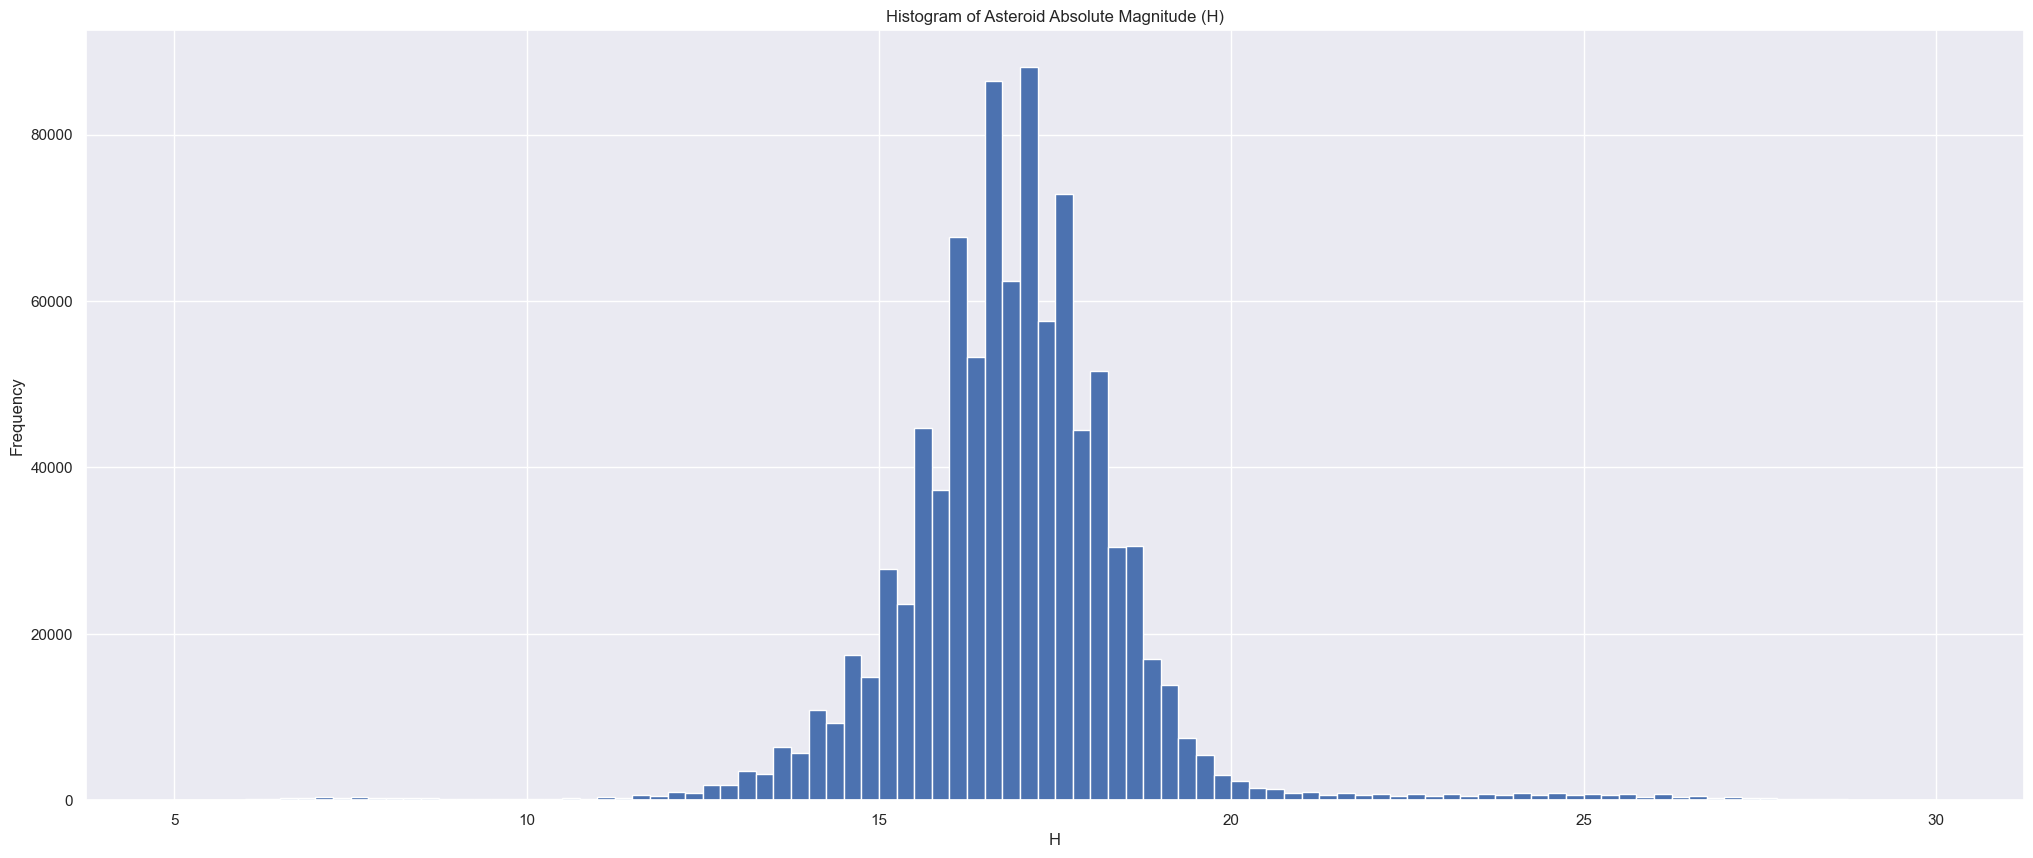

In [18]:
asteroids_clean["H"].hist(bins=100, range=[5,30])
plt.xlabel("H")
plt.ylabel("Frequency")
plt.title("Histogram of Asteroid Absolute Magnitude (H)")

Text(0.5, 1.0, 'Histogram of Diameter in Kilometers')

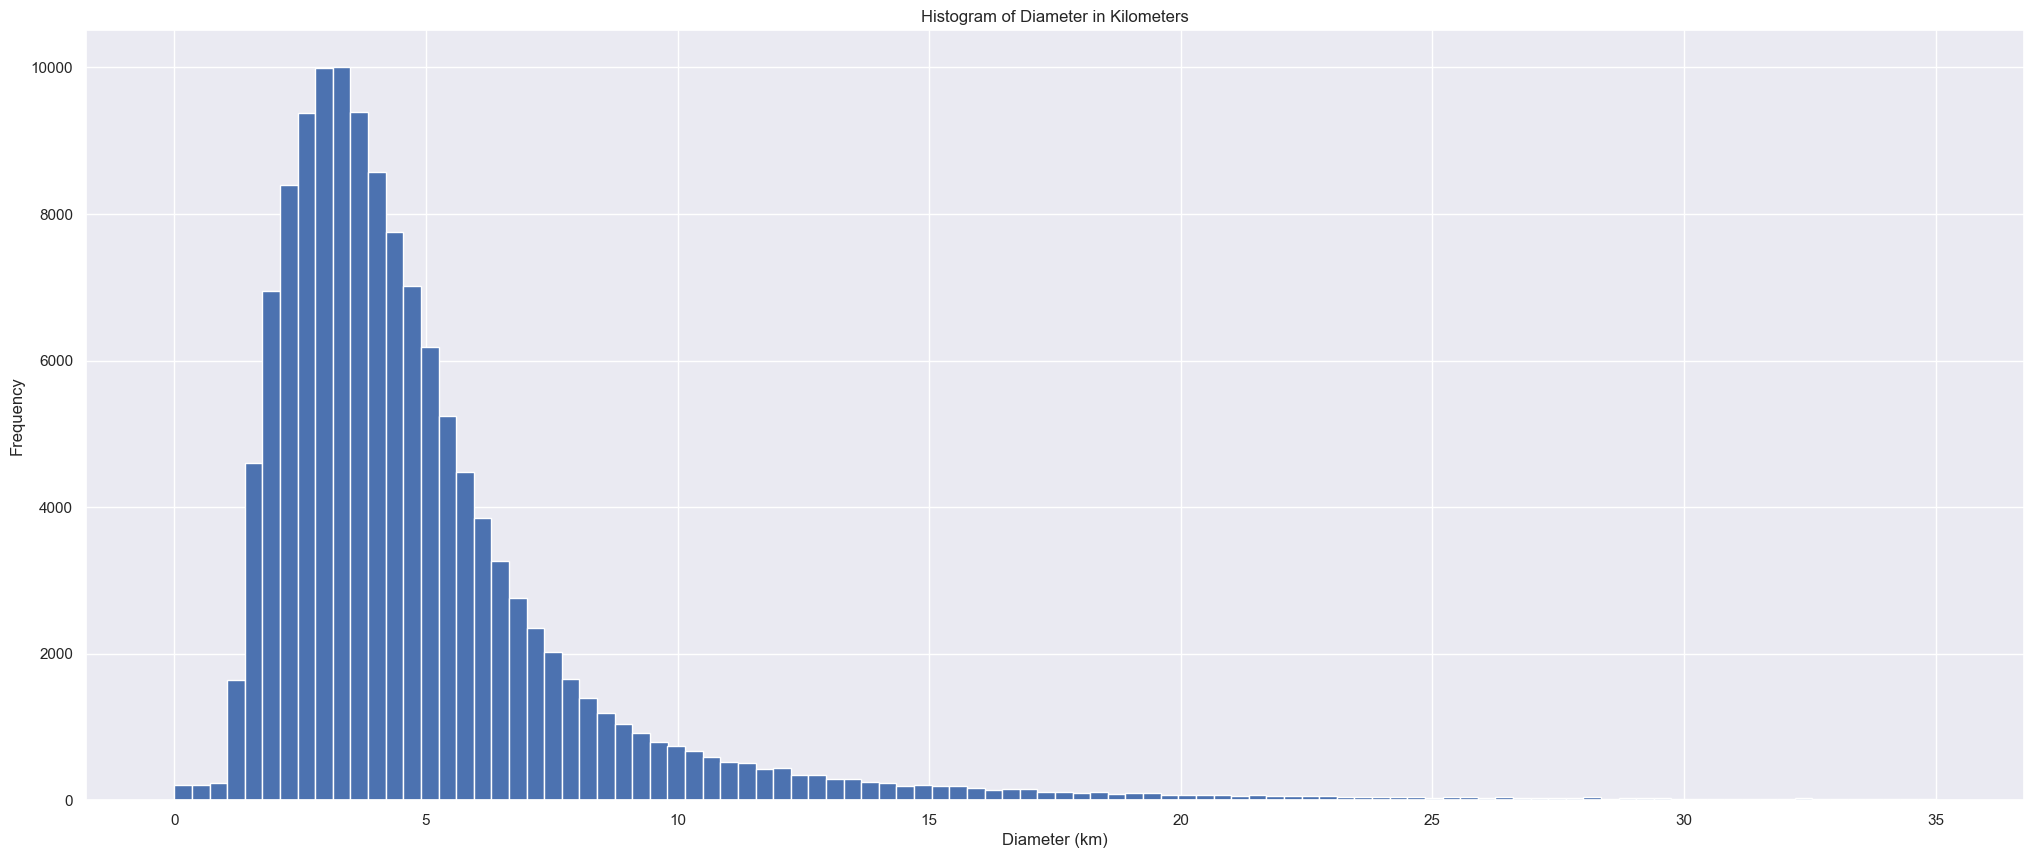

In [19]:
asteroids_clean["diameter"].hist(bins=100, range=[0,35])
plt.xlabel("Diameter (km)")
plt.ylabel("Frequency")
plt.title("Histogram of Diameter in Kilometers")

In [20]:
asteroids_clean[asteroids_clean["diameter"] > 35]

,full_name,neo,pha,H,diameter,e,q,moid,class
0,1 Ceres,N,N,3.40,939.400,0.076009,2.558684,1.59478,MBA
1,2 Pallas,N,N,4.20,545.000,0.229972,2.135935,1.23429,MBA
2,3 Juno,N,N,5.33,246.596,0.256936,1.982706,1.03429,MBA
3,4 Vesta,N,N,3.00,525.400,0.088721,2.151909,1.13948,MBA
4,5 Astraea,N,N,6.90,106.699,0.190913,2.082619,1.09575,MBA
...,...,...,...,...,...,...,...,...,...
342841,342842 (2008 YB3),N,N,9.30,67.100,0.441169,6.482490,5.58965,CEN
668678,(2010 BK118),N,N,10.20,46.400,0.983789,6.097490,5.09367,TNO
684528,(2010 TH),N,N,9.30,69.900,0.324199,12.511241,11.52680,CEN
690131,(2010 WG9),N,N,8.10,112.700,0.647566,18.733658,18.23360,TNO


In [21]:
drop1 = asteroids_clean["diameter"] > 35
asteroids_clean = asteroids_clean[~drop1]

Text(0.5, 1.0, 'Histogram of Orbital Eccentricity')

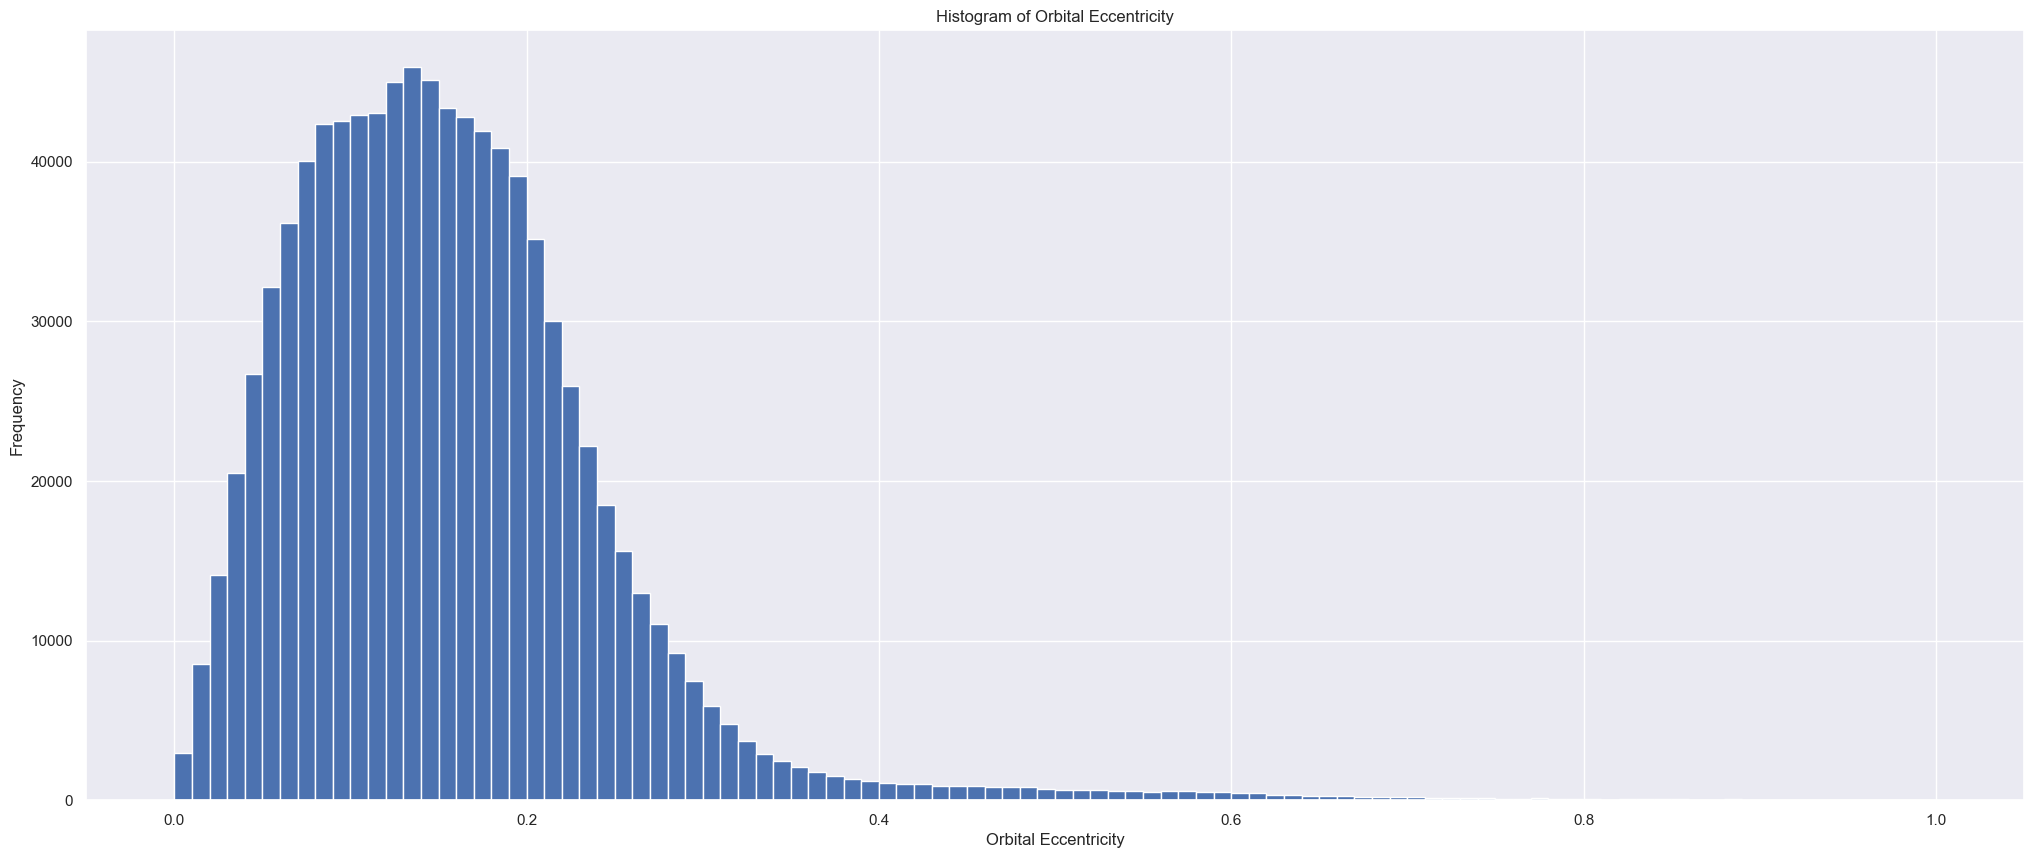

In [22]:
asteroids_clean["e"].hist(bins=100)
plt.xlabel("Orbital Eccentricity")
plt.ylabel("Frequency")
plt.title("Histogram of Orbital Eccentricity")

Text(0.5, 1.0, 'Histogram of Perihelion Distance in Astronomical Units')

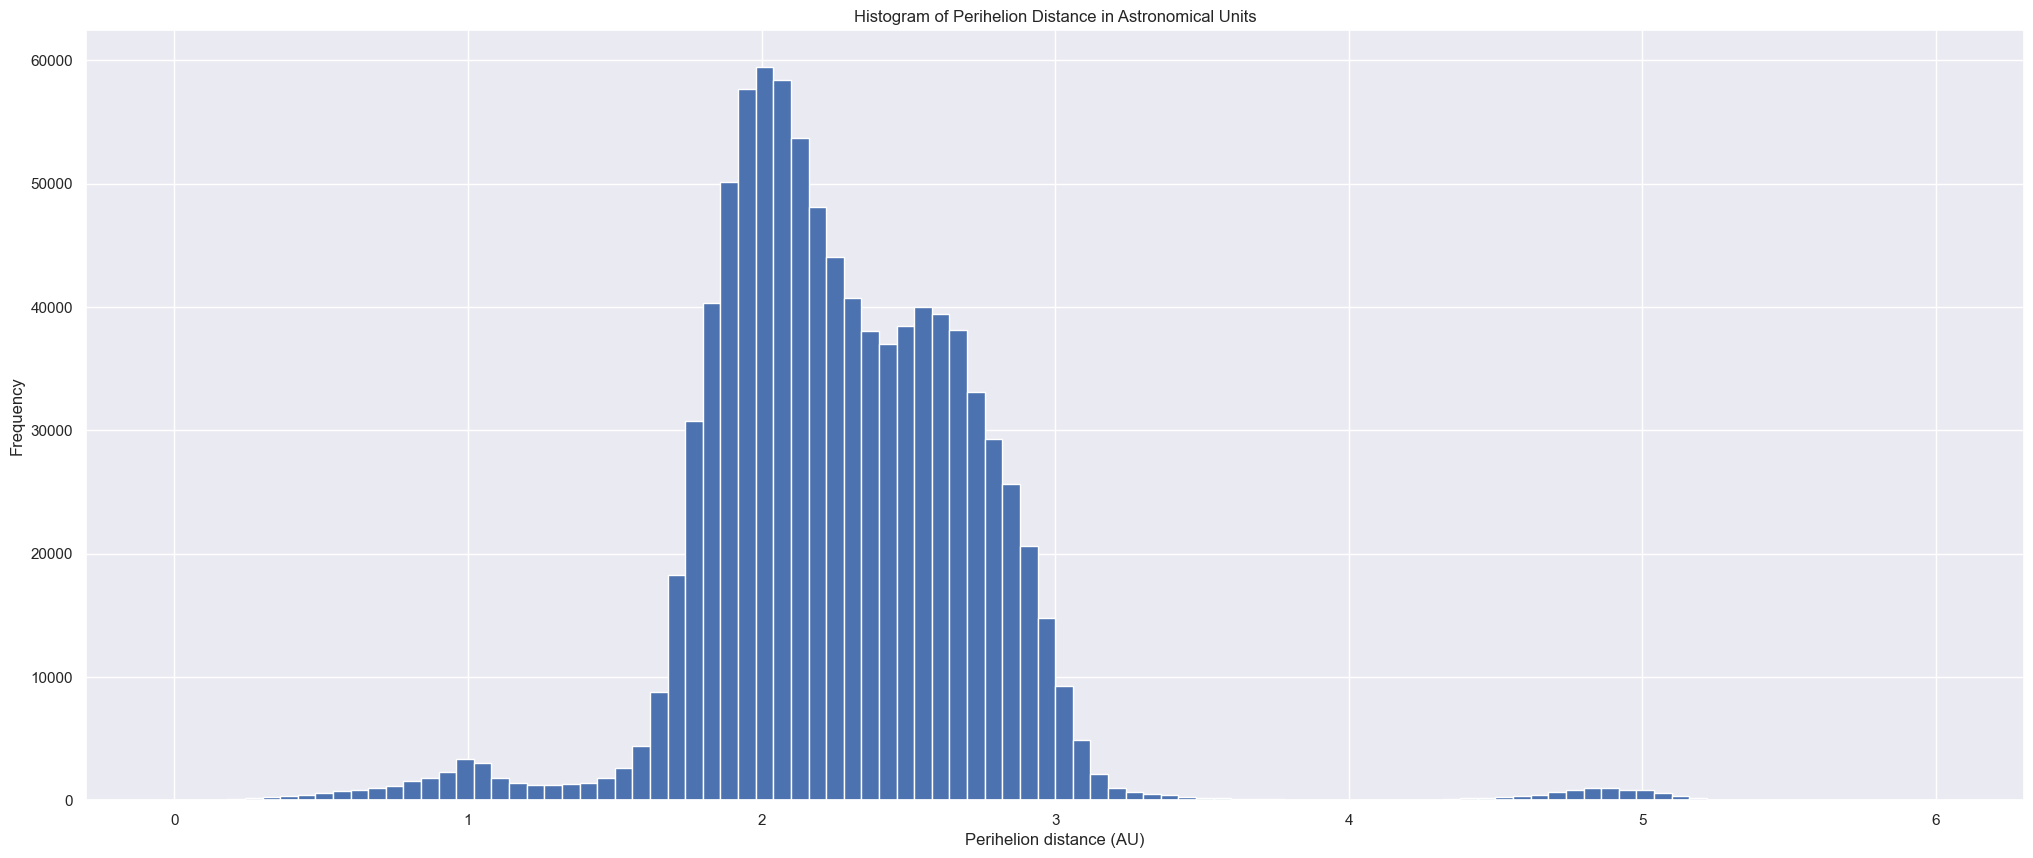

In [23]:
asteroids_clean["q"].hist(bins=100, range=[0, 6])
plt.xlabel("Perihelion distance (AU)")
plt.ylabel("Frequency")
plt.title("Histogram of Perihelion Distance in Astronomical Units")

In [24]:
asteroids_clean[asteroids_clean["q"] > 50]

,full_name,neo,pha,H,diameter,e,q,moid,class
90376,90377 Sedna (2003 VB12),N,N,1.3000,NaN,0.842587,76.256711,75.2856,TNO
541131,541132 (2015 TG387),N,N,5.5000,NaN,0.939970,65.160351,64.1891,TNO
578243,(2004 XR190),N,N,4.1000,NaN,0.105526,51.206316,50.4956,TNO
734514,(2012 VP113),N,N,4.0000,NaN,0.692538,80.398819,79.4766,TNO
756203,(2013 SY99),N,N,6.7000,NaN,0.931213,50.077740,49.0915,TNO
771025,(2014 FZ71),N,N,6.9000,NaN,0.259423,55.845909,54.9276,TNO
771028,(2014 FC72),N,N,4.5000,NaN,0.317970,51.660162,50.6944,TNO
799002,(2014 ST373),N,N,5.4367,NaN,0.519776,50.196603,49.4174,TNO
831599,(2015 FJ345),N,N,7.9000,NaN,0.190090,50.682616,49.8693,TNO


In [25]:
drop2 = asteroids_clean["q"] > 50
asteroids_clean = asteroids_clean[~drop2]

Text(0.5, 1.0, 'Histogram of Earth MOIDs in Astronomical Units')

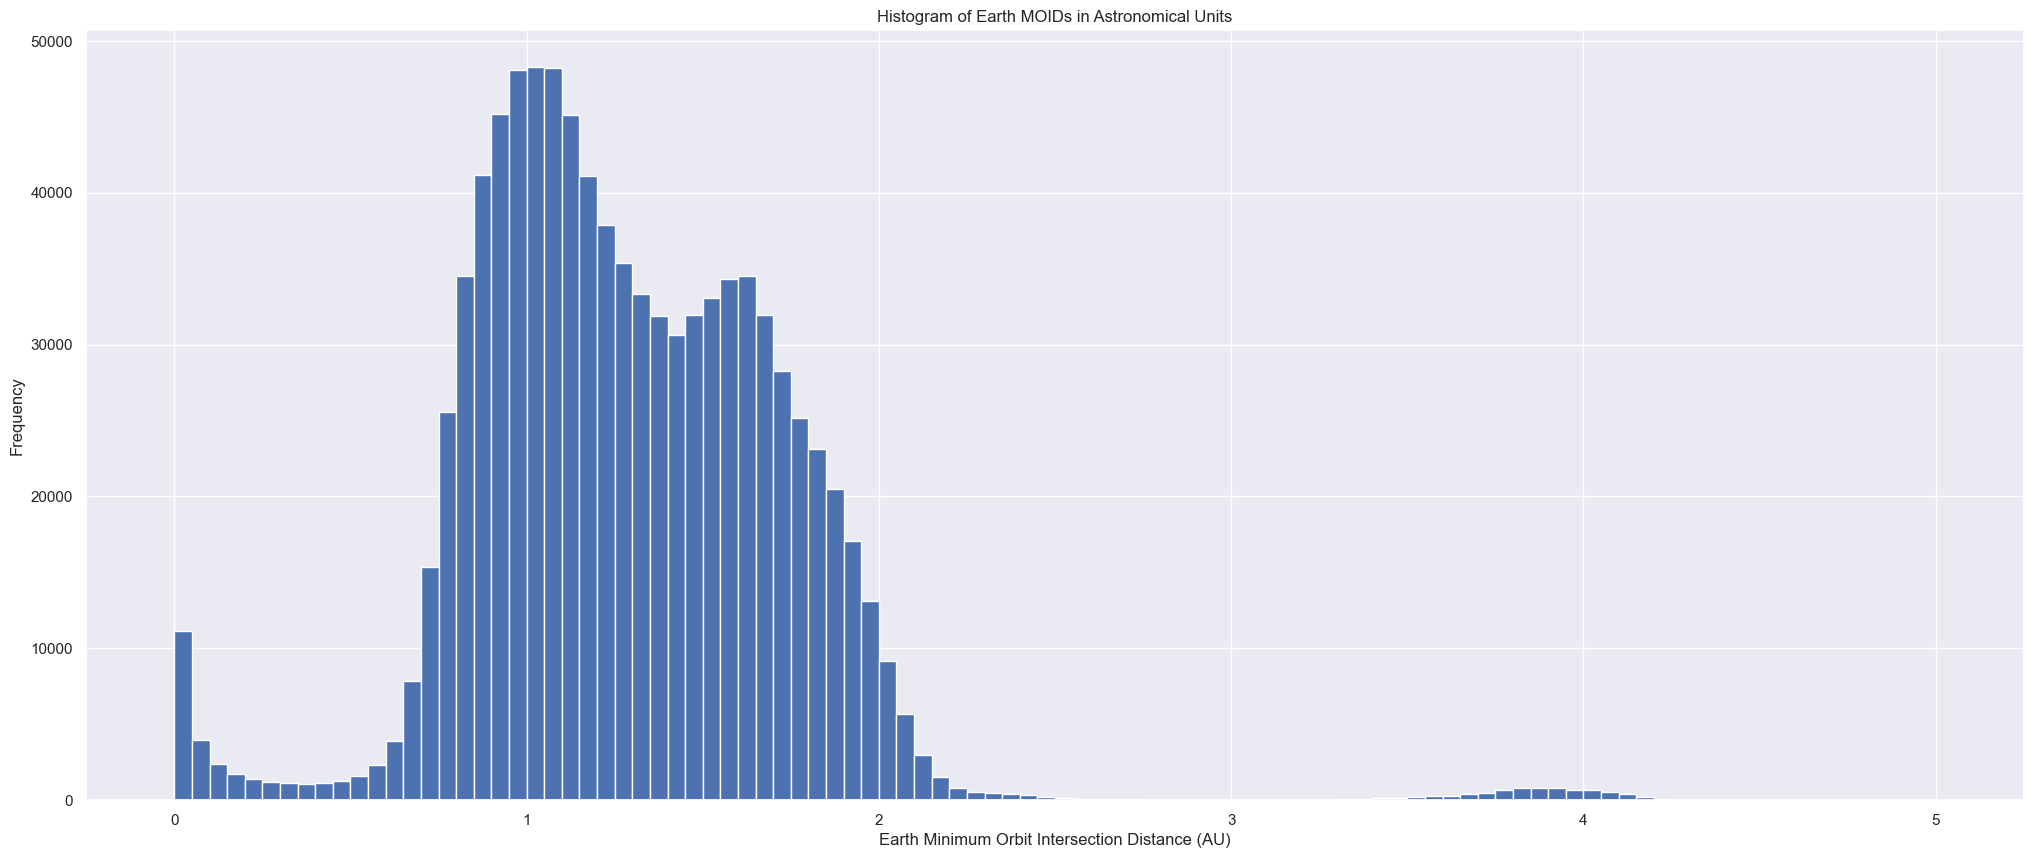

In [26]:
asteroids_clean["moid"].hist(bins=100, range = [0, 5])
plt.xlabel("Earth Minimum Orbit Intersection Distance (AU)")
plt.ylabel("Frequency")
plt.title("Histogram of Earth MOIDs in Astronomical Units")

After looking for uncommon values in the data, I removed an additional 1219 observations, which is 0.131% of the dataset left after the first wave of data cleaning. Specifically, I dropped 1210 observations with diameters greater than 35 kilometers, which is 0.916% of the observations with recorded diameters after the first wave of data cleaning, because those observations were far above the rest of the data when looking at the histogram for diameter. Similarly I dropped 9 observations with perihelion distances greater than 50 AU because they were significantly higher than the rest of the data when looking at the histogram for it. I was going to remove observations with earth minimum orbit interesection distances larger than 50 AU but they were already removed so nothing needed to be done. I left absolute magnitude and orbital eccentricity alone because the range of observations is lower for both (around 25 for absolute magnitudes and 1 for orbital eccentricity). Even though some of the remaining data may contain outliers for some variables, they're not as extreme as the one's already removed. Doing it this way, the results from my analysis will still be relatively applicable to the entire sample (aside from diameter) and potentially population of interest because much of the sample is still used. Removing those very extreme values will make the visualizations below look better and easier to analyze as well.

## 4. Summarizing Data

Here's what's left of the data after cleaning.

In [27]:
asteroids_clean

,full_name,neo,pha,H,diameter,e,q,moid,class
130,131 Vala,N,N,9.900,31.337,0.067371,2.268057,1.258610,MBA
148,149 Medusa,N,N,10.500,23.719,0.064923,2.033310,1.043750,MBA
156,157 Dejanira,N,N,11.100,19.959,0.197300,2.070759,1.106940,MBA
169,170 Maria,N,N,9.400,33.136,0.063495,2.391165,1.412170,MBA
179,180 Garumna,N,N,10.200,23.440,0.167389,2.265418,1.280490,MBA
...,...,...,...,...,...,...,...,...,...
958519,(6013 P-L),N,N,17.135,NaN,0.185919,1.856807,0.861979,MBA
958520,(6331 P-L),N,N,18.500,NaN,0.282920,1.674319,0.671242,MBA
958521,(6344 P-L),Y,Y,20.400,NaN,0.662446,0.950941,0.035589,APO
958522,(2060 T-2),N,N,18.071,NaN,0.202053,1.893638,0.893896,MBA


A research question that I wanted to address with analysis would be what is the relationship between absolute magnitude (H) and whether or not the asteroid is a potentially hazardous asteroid (pha). I think that the absolute magnitude for phas will be generally lower than that of non-phas. 

Text(0.5, 1.0, 'Boxplot of PHA status and Absolute Magnitude')

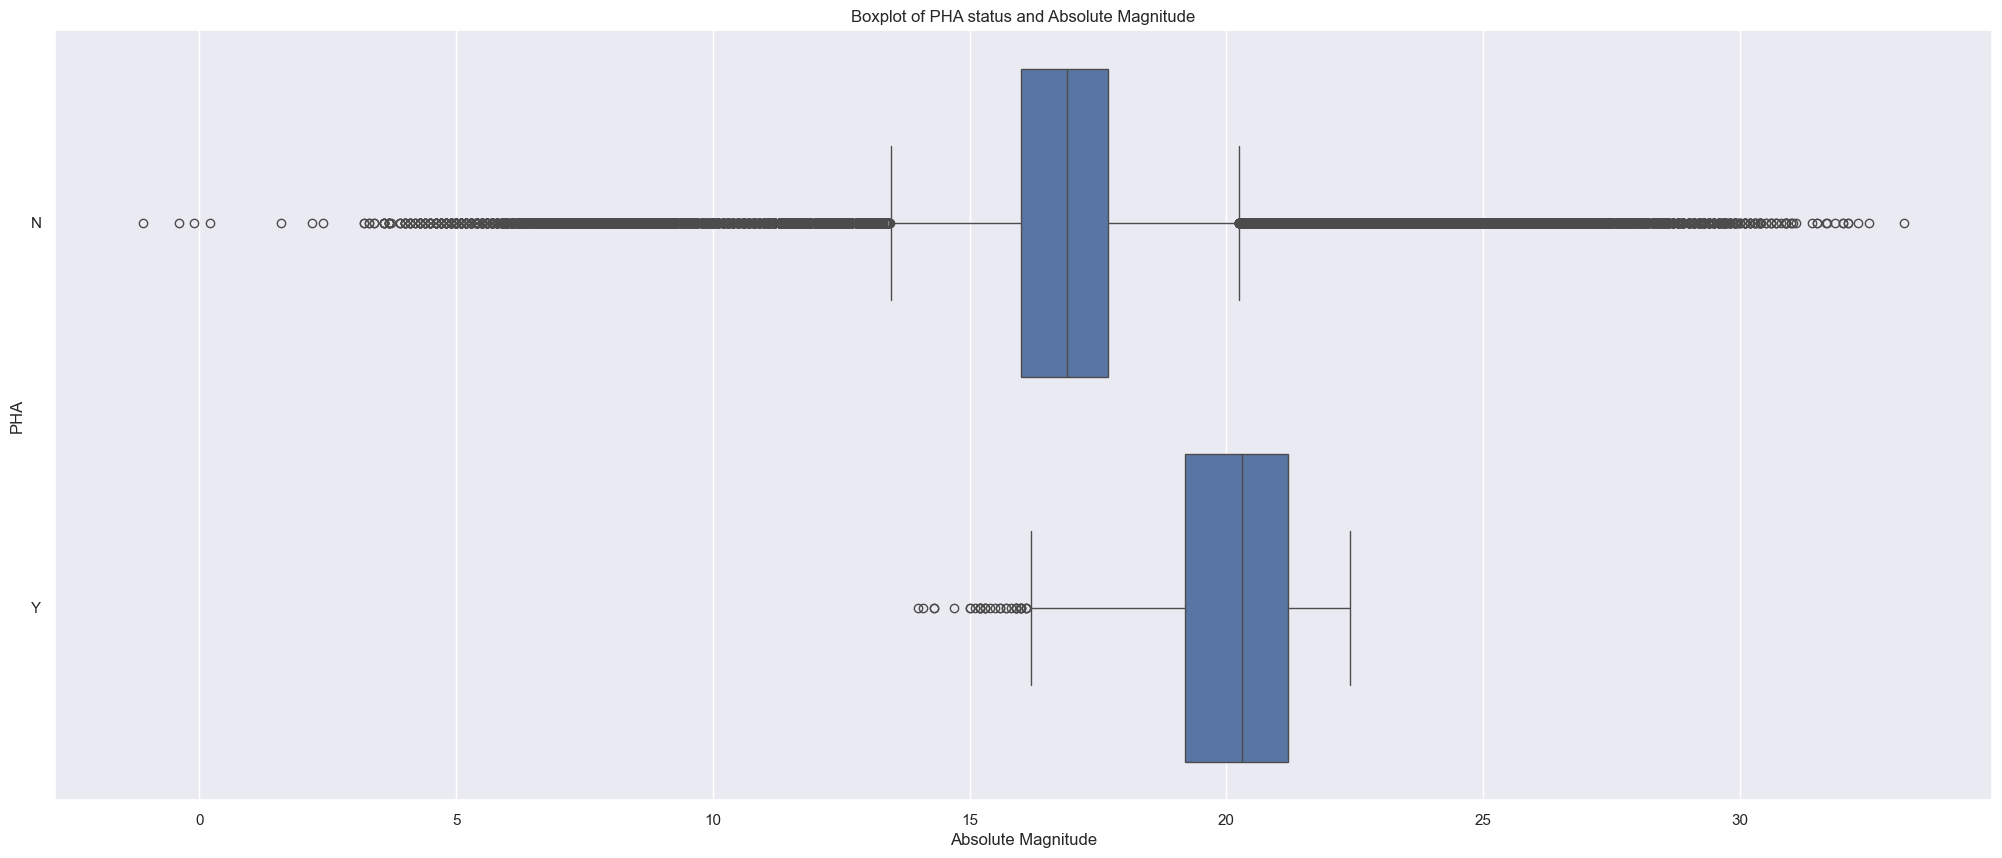

In [28]:
sns.boxplot(x="H", y="pha", data=asteroids_clean)
plt.xlabel("Absolute Magnitude")
plt.ylabel("PHA")
plt.title("Boxplot of PHA status and Absolute Magnitude")

In [29]:
H_neo = asteroids_clean[["pha", "H"]]
H_neo.groupby("pha").describe()

H                                                   
        count       mean       std   min   25%   50%   75%   max
pha                                                             
N    929052.0  16.892679  1.776000  -1.1  16.0  16.9  17.7  33.2
Y      2066.0  20.070387  1.461095  14.0  19.2  20.3  21.2  22.4

I would say that the absolute magnitude distribution for non-phas looks fairly normal at least from the boxplot with lots of outliers above and below the distribution. The absolute magnitude distribution for phas seems to be left skewed with outliers below the distribution. The median absolute magnitude for non-phas is 16.9 and the median absolute magnitude for phas is around 20.3. The IQRs for both distributions are relatively similar at 1.7 for the non-phas and at 2 for the phas. From this we can see that there does seem to be a relationship between the two variables. PHAs seem to have a smaller range of absolute magnitudes that are generally greater than that of non-phas which have absolute magnitudes spanning across a large range. The number of phas is so small compared to the non-phas so it makes sense why the absolute magnitude range for phas is so much smaller as well with significantly less outliers. I was somewhat surprised to see that phas had a higher median absolute magnitude than non-phas because I thought phas would have larger diameters and thus more be more reflective of light, yielding a lower absolute magnitude. Since absolute magnitude depends on both the diameter and how pale the asteroid is, the asteroid could be very large but not pale at all, resulting in a high absolute magnitude, so I can't get a definitive answer to that specific question with this analysis.

## Any other type of analysis/question you want to explore with this dataset.

<u>Why?</u>: Sometimes undergraduate students will put the research projects that they did for their classes on their resumes when applying for graduate schools, internships, and jobs. If you're interested in showcasing cool analyses to write on your resume, this section could help with that. **(This section is not worth any points though).**

Next, I want to see the relationship between diameter and neo status. I'm not sure how this one will turn out but I'm definitely curious.

Text(0.5, 1.0, 'Violinplot of NEO Status and Diameter')

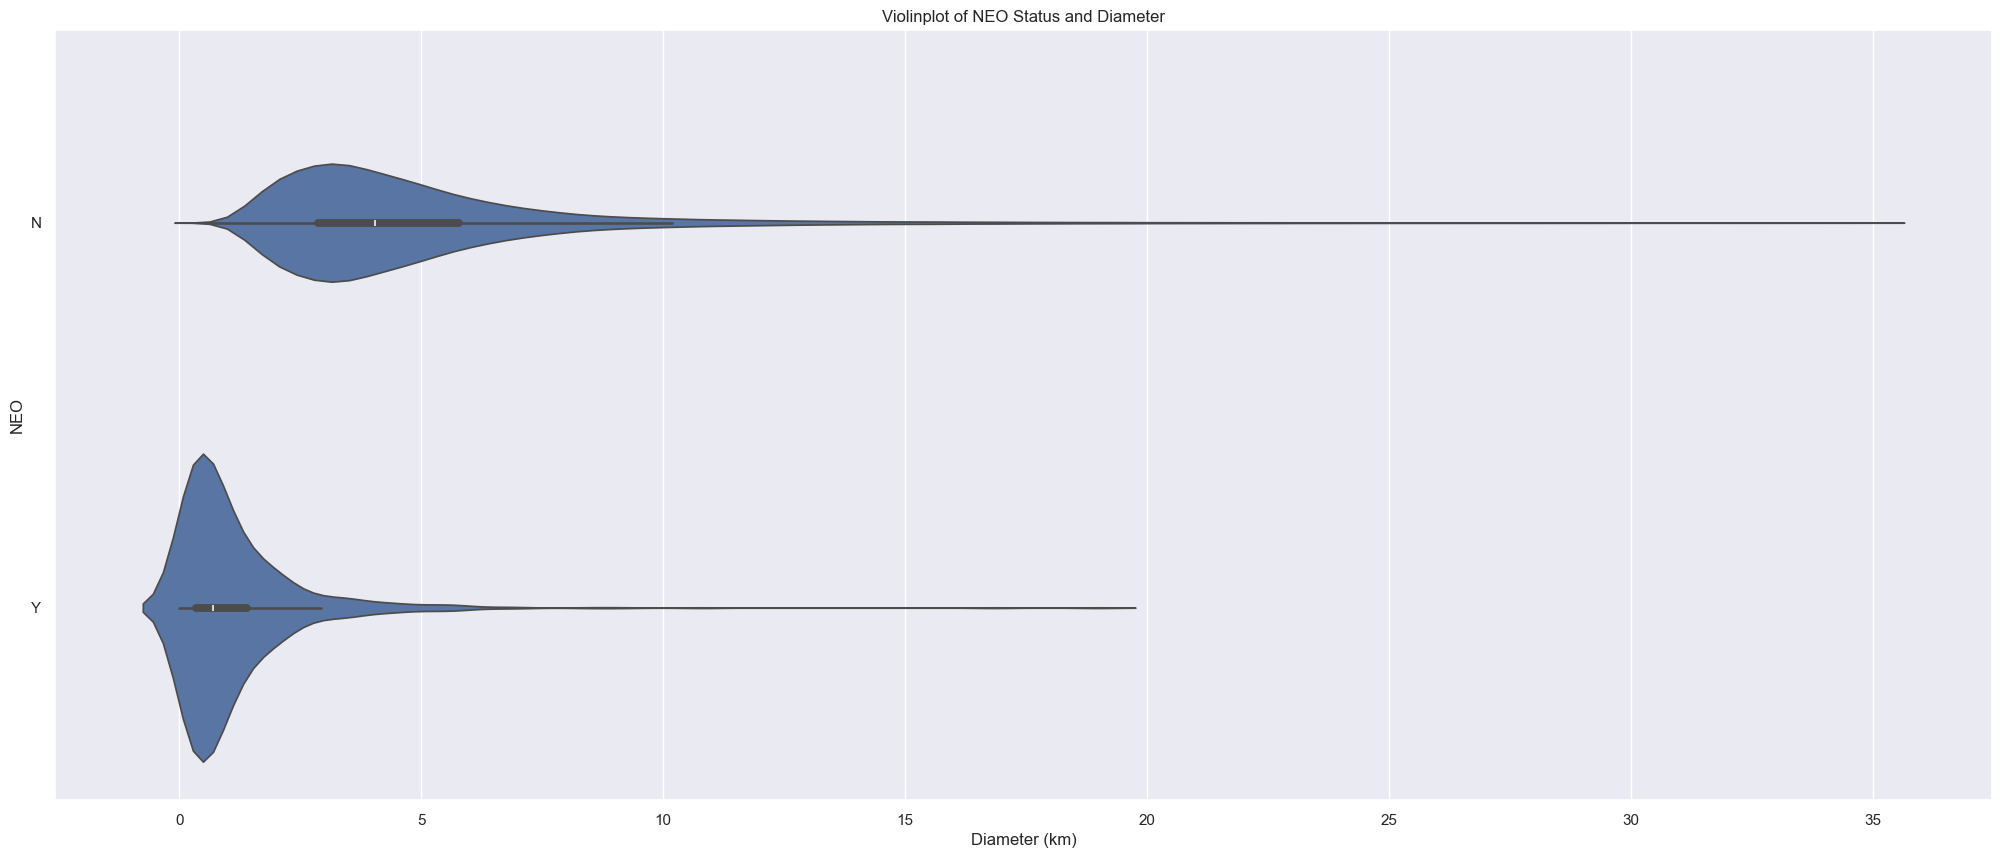

In [30]:
sns.violinplot(x="diameter", y="neo", data=asteroids_clean)
plt.xlabel("Diameter (km)")
plt.ylabel("NEO")
plt.title("Violinplot of NEO Status and Diameter")

In [31]:
diameter_neo_pha = asteroids_clean[["neo", "diameter"]]
diameter_neo_pha.groupby("neo").describe()

diameter                                                          
        count      mean       std     min     25%    50%    75%     max
neo                                                                    
N    129991.0  4.971893  3.622545  0.5870  2.8590  4.041  5.789  34.957
Y       844.0  1.127457  1.455132  0.0025  0.3485  0.700  1.400  19.000

Looking at the violinplot for both neos and non-neos, it's easy to tell that both distributions are heavily skewed right. Both distributions have some big outliers on the high end. The medians are actually quite different on the scale of kilometers with non-neos having a median diameter of 4.4041 km and neos having a median diameter of 0.700 km. The IQRs for both distributions are also quite different with the non-neos at around 2.93 and the neos at around 1.05. It would seem that neos are generally larger than that of non-neos. I guess it does make sense that the size of an asteroid isn't what makes it potentially hazardous, but it is interesting that the larger asteroids are non-neo. I'm assuming other factors like how close it can get to the earth would better determine if an asteroid is a near earth object or even potentially hazardous.

Another question that I had was the relationship between perihelion distance and minimum orbit intersection distance with neo status indicated by the hue of the point. I'm assuming there should be a relationship since if something is closer to the Sun, it'll be closer to Earth as well.

Text(0.5, 1.0, 'Scatterplot of Earth MOID vs Perihelion Distance with NEO Status')

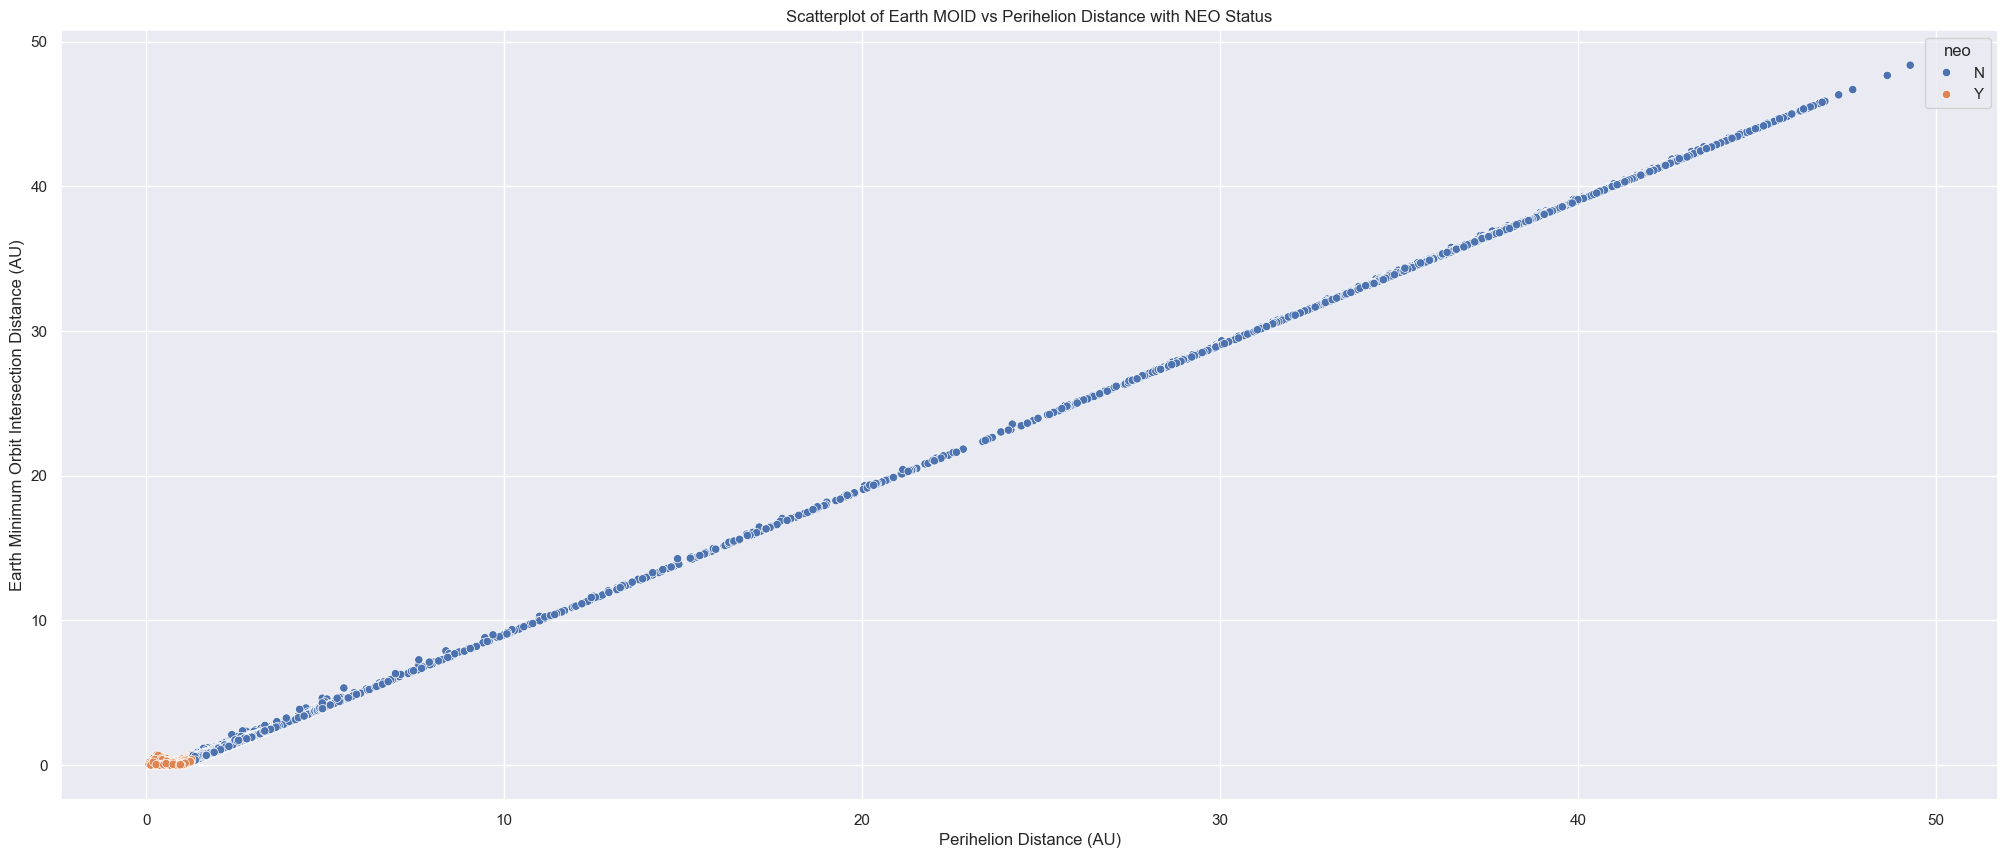

In [32]:
sns.scatterplot(x="q", y="moid", hue="neo", data=asteroids_clean)
plt.xlabel("Perihelion Distance (AU)")
plt.ylabel("Earth Minimum Orbit Intersection Distance (AU)")
plt.title("Scatterplot of Earth MOID vs Perihelion Distance with NEO Status")

As seen from the scatterplot, perhelion distance and moid are most definitely related which makes a lot of sense and matches my assumption above. The relationship is a very well defined linear, strong, positive one. The neo status of an asteroid also seems to depend on these two variables as from what I can see, practically all of the asteroids with low perihelion distance and moid are neos.

As previously stated, absolute magnitude and diameter are related, but how so? I used a scatterplot to visualize the relationship between the two variables with pha status as third variable indicated by the hue of the points.

Text(0.5, 1.0, 'Scatterplot of Diameter vs Absolute Magnitude with PHA Status')

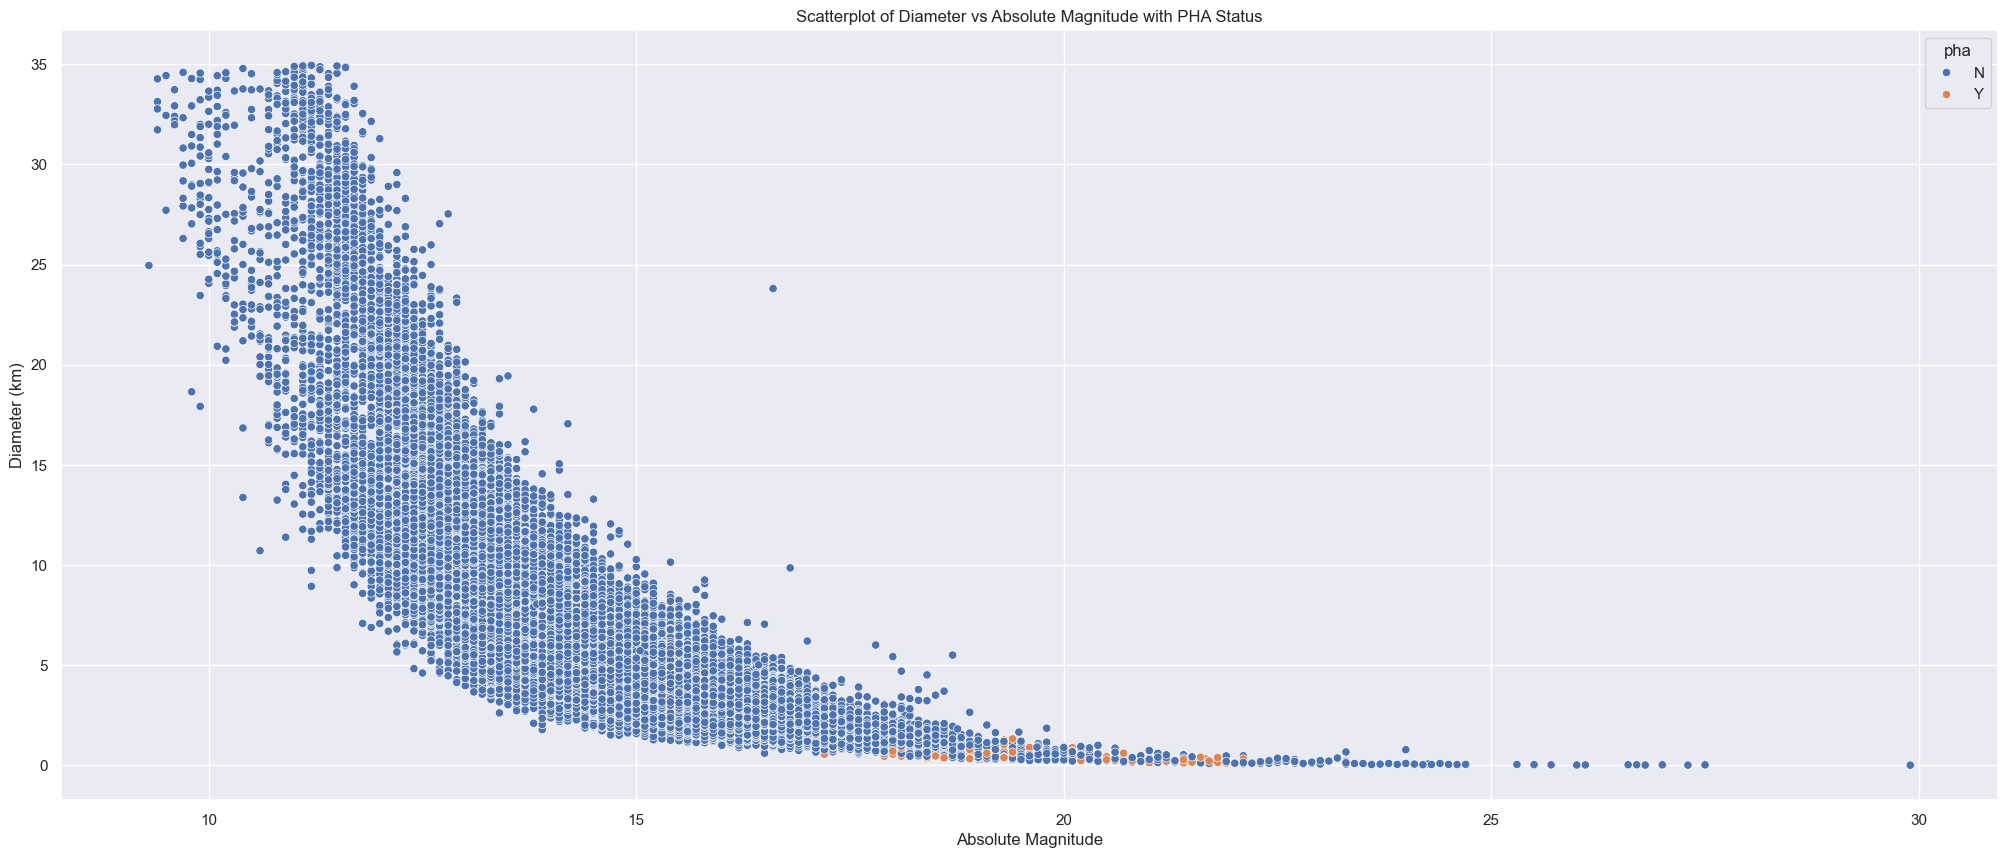

In [33]:
sns.scatterplot(x="H", y="diameter", hue="pha", data=asteroids_clean)
plt.xlabel("Absolute Magnitude")
plt.ylabel("Diameter (km)")
plt.title("Scatterplot of Diameter vs Absolute Magnitude with PHA Status")

From the graph we can see that there is a negative exponential relationship between absolute magnitude and diameter for the portion of the sample that have diameter values. The phas seem to be under a certain diameter and around the 20 absolute magnitude. Although the graph seems to show that phas have relatively low diameters, there's probably more to the story than that as not all low diameter asteroids are phas. From the scatterplot we can see that there seems to be other variables affecting whether or not an asteroid is potentially hazardous.

Another research question that I wanted to address with analysis would be what is the relationship between absolute magnitude and minimum orbit intersection distance based on whether or not the asteroid is a neo which is indicated by the hue of the point.

Text(0.5, 1.0, 'Scatterplot of Earth MOID vs Absolute Magnitude with NEO status')

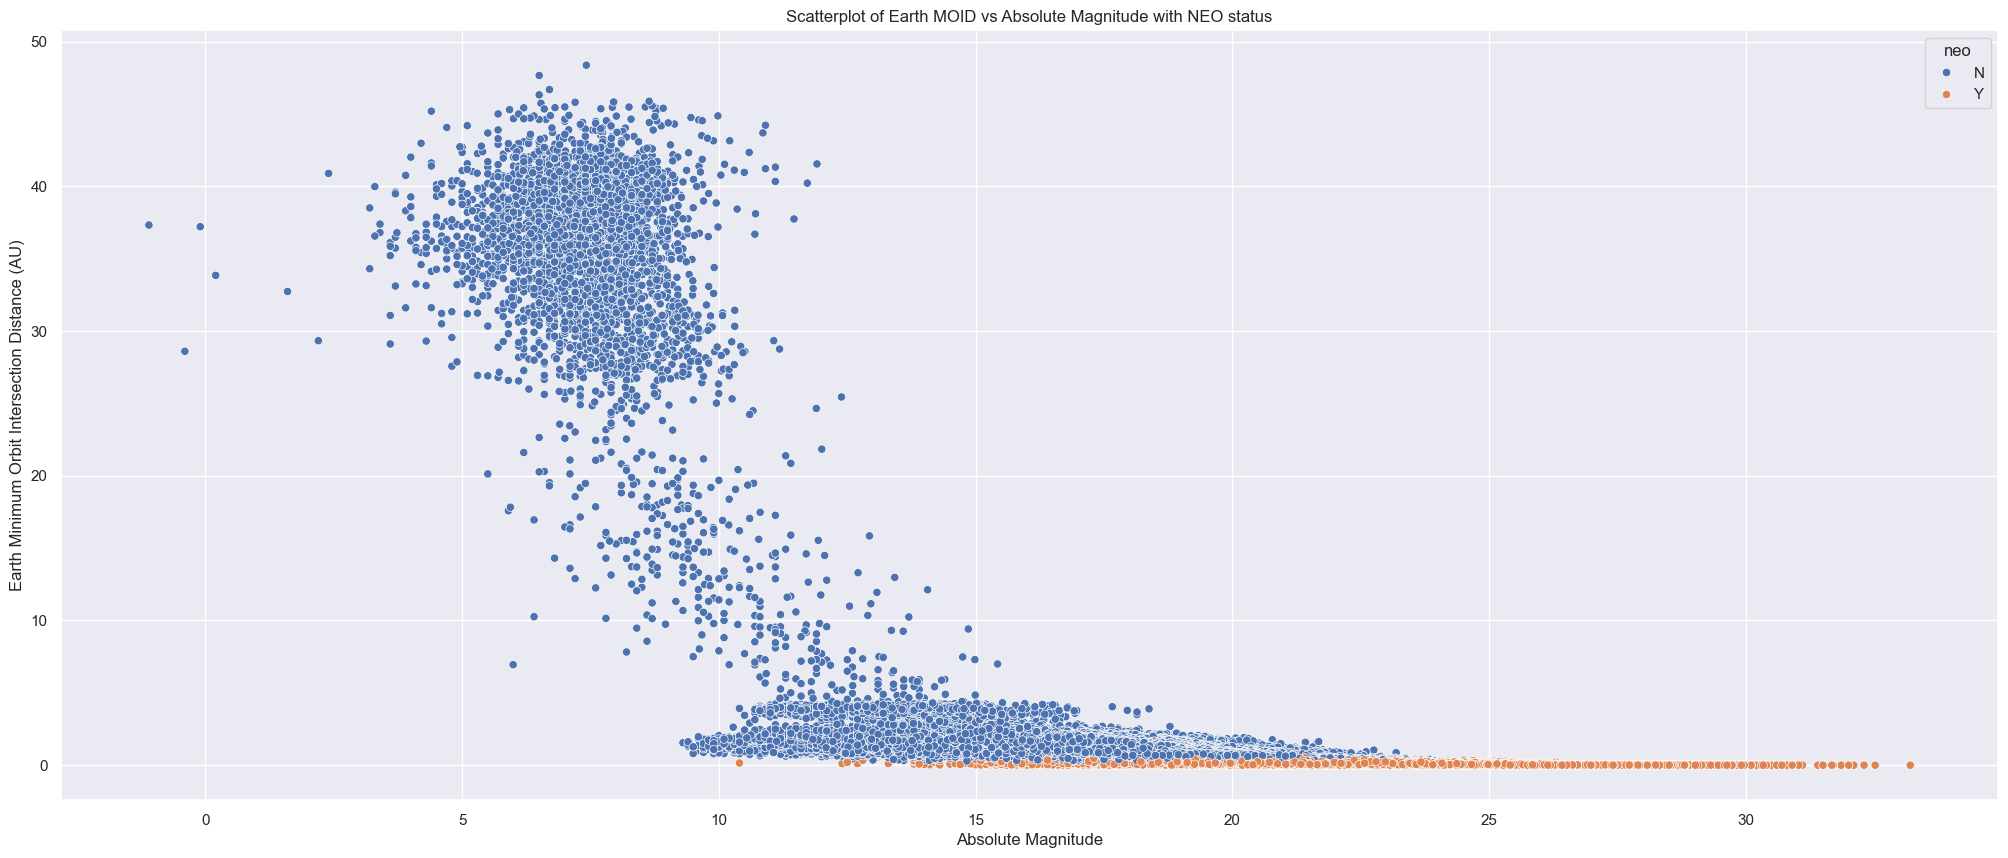

In [34]:
sns.scatterplot(x="H", y="moid", hue="neo", data=asteroids_clean)
plt.xlabel("Absolute Magnitude")
plt.ylabel("Earth Minimum Orbit Intersection Distance (AU)")
plt.title("Scatterplot of Earth MOID vs Absolute Magnitude with NEO status")

From the scatterplot we can see that there does seem to be a relationship between absolute magnitude and moid. What's interesting is that while the relationship seems to be a fairly negative exponential one, there appear to be two main clusters of points in the scatterplot. One cluster is of points is asteroids with low absolute magnitude and a relatively high earth moid and another cluster is asteroids with mid to high absolute magnitudes and relatively low earth moids. Another thing to point out is that lots of the asteroids that have low moids are considered to be near earth objects, so this indicates that moid probably does play a role in determining an asteroid's neo status.

I also want to see the relationship between asteroid orbit class and absolute magnitude with pha status as the hue of the distribution. Only the neo asteroids should have a pha distributions so I'm interested in comparing between the non-pha and pha distributions for those four classes. I'm also interested in seeing the differences in absolute magnitudes across all orbit classes.

Text(0.5, 1.0, 'Violinplot of Absolute Magnitude and Asteroid Orbit Class with PHA status')

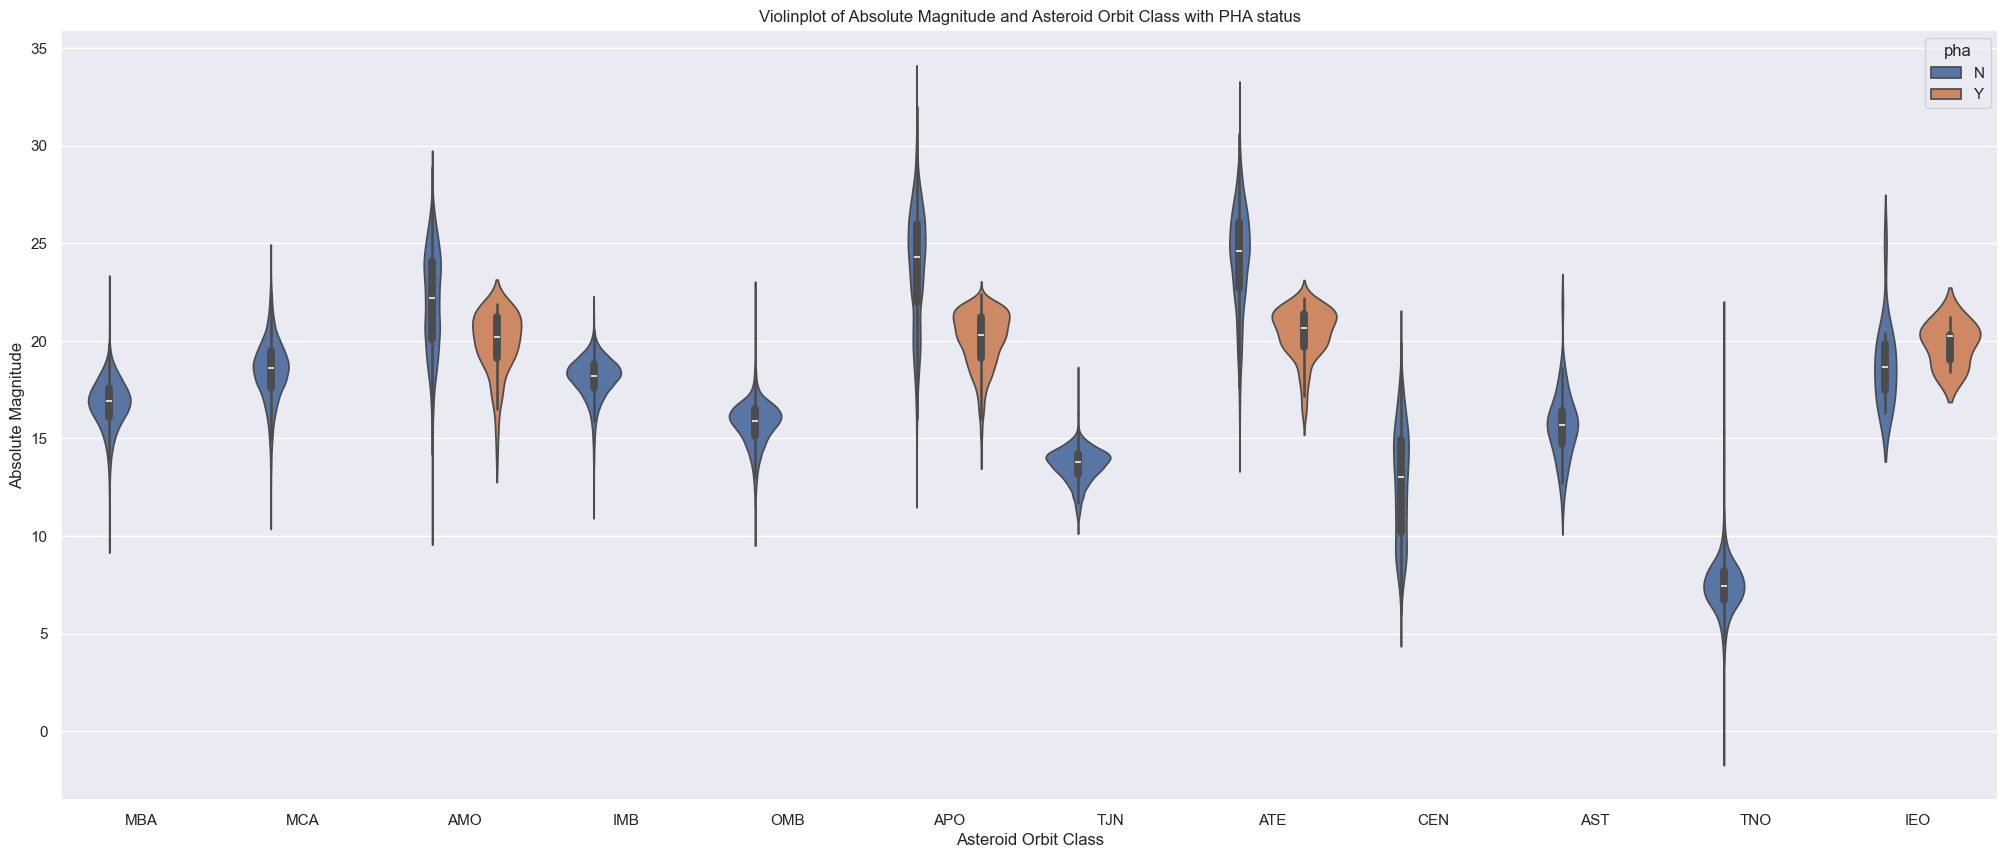

In [35]:
sns.violinplot(x="class", y="H", hue="pha", data=asteroids_clean)
plt.xlabel("Asteroid Orbit Class")
plt.ylabel("Absolute Magnitude")
plt.title("Violinplot of Absolute Magnitude and Asteroid Orbit Class with PHA status")

As mentioned before, only the four neo classes have pha asteroids. Within the four neo classes, AMO, APO, and ATE have what appears to be left skewed non-pha distributions although it's a little hard to tell for APO and ATE. The last of the neo class, ATI/IEO, stands out as having a right skewed non-pha distribution. The pha distributions of all four neo classes are skewed left. The non-pha median absolute magnitudes for the AMO, APO, ATE, and IEO classes are around 23, 24, 24.5, and 18.5 respectively. The pha median absolute magnitudes for the AMO, APO, ATE, and IEO classes are around 20, 20.5, 21, and 20.5 respectively. Another thing to note is that the medians for the pha distributions are lower than the medians for the non-pha distributions for the AMO, APO, and ATE classes while the median for the pha distribution is greater than the median for the non-pha distribution for the ATI/IEO class. The IQRs for the four neo class non-pha distribution seem to differ slightly, ranging from approximately 2.5 to approximately 4. The IQRs for the four neo class pha distributions seem to stay somewhat constant at around 2. The difference in non-pha and pha medians for AMO and IEO/ATI is around 2 with AMOs having a lower pha median compared to its non-pha median and IEO/ATIs having a higher pha median compared to its non-pha median. The difference in non-pha and pha medians for APO and ATE is about 4 with the pha median being lower than the non-pha median for both. While these distributions do show us that the neo class phas have generally lower absolute magnitudes when compared to their non-pha counterparts of the same class with the exception of IEO/ATIs, it shows us that absolute magnitude alone is unable to fully determine whether an asteroid is potentially hazardous or not because not all asteroids with relatively low absolute magnitudes are phas.

In [36]:
H_class = asteroids_clean[["H", "class"]]
H_class = H_class[(H_class["class"] != "AMO") & (H_class["class"] != "APO") & (H_class["class"] != "ATE") & (H_class["class"] != "IEO")]
H_class.groupby("class").describe()

H                                                             
          count       mean       std      min   25%      50%     75%     max
class                                                                       
AST        57.0  15.627088  1.709864  11.6000  14.7  15.7000  16.400  21.900
CEN       479.0  12.677439  2.844372   5.9936  10.2  13.0000  14.912  19.900
IMB     19702.0  18.108157  1.064655  11.2000  17.6  18.2000  18.800  21.998
MBA    831833.0  16.782421  1.250315   9.3000  16.1  16.9000  17.600  23.188
MCA     17788.0  18.484525  1.572176  10.8000  17.6  18.6000  19.465  24.500
OMB     27003.0  15.751812  1.160216   9.8000  15.1  15.9000  16.500  22.742
TJN      7929.0  13.651933  0.875534  10.4000  13.2  13.8000  14.200  18.376
TNO      3445.0   7.554920  1.664833  -1.1000   6.7   7.4344   8.200  21.369

Roughly estimating from the violinplot, the neo classes seem to have median absolute magnitudes greater than or equal to that of the rest of the classes. Going through the non-neo classes: the MBA and MCA classes seem to have fairly normal distributions, the IMB and CEN classes seem to have skewed left distributions, and the OMB, TJN, AST, and TNO classes seem to have skewed right distributions. For more comparison, MBA, MCA, IMB, OMB, and AST classes have median absolute magnitudes between 15 to 20, while TJN, CEN, and TNO classes have median absolute magnitudes between 5 and 15. The IQRs for the MBA, MCA, IMB, OMB, and AST classes range from around 1 to 2. The IQRs for the TJN, CEN, and TNO classes range from around 1 to 5. Overall, it seems that the asteroid classes that are closer to the main asteroid belt seem to have higher absolute magnitudes than the asteroid classes near Jupiter and beyond.

Looking at the crosstab below we can see that the majority of the phas are Apollos and only six phas make up the IEO/ATI distribution. IEO/ATIs seems to stand out the most out of all the neo asteroids. It also shows us that the large majority of the asteroids in the dataset are in a class (IMB, MBA, and OMB) relating to the main asteroid belt between Mars and Jupiter. It's also good to note that the hyperbolic asteroids (HYA) have been removed from the dataset, but since there were only four at the start, I'm not too worried about their absence since they are such a small proportion of the asteroid classes listed. 

In [37]:
pha_class = asteroids_clean[["pha", "class"]]
pha_class = pha_class[(pha_class["class"] == "AMO") | (pha_class["class"] == "APO") | (pha_class["class"] == "ATE") | (pha_class["class"] == "IEO")]
pd.crosstab(pha_class["pha"], pha_class["class"])

class,AMO,APO,ATE,IEO
pha,,,,
N,8329,10916,1555,16
Y,118,1768,174,6


The next research question that I had was the relationship between perihelion distance and orbital eccentricity with neo status indicated by the hue of the point. I don't expect there to be a relationship but I'm just curious as to what the scatterplot would look like.

Text(0.5, 1.0, 'Scatterplot of Orbital Eccentricity and Perihelion Distance with NEO status')

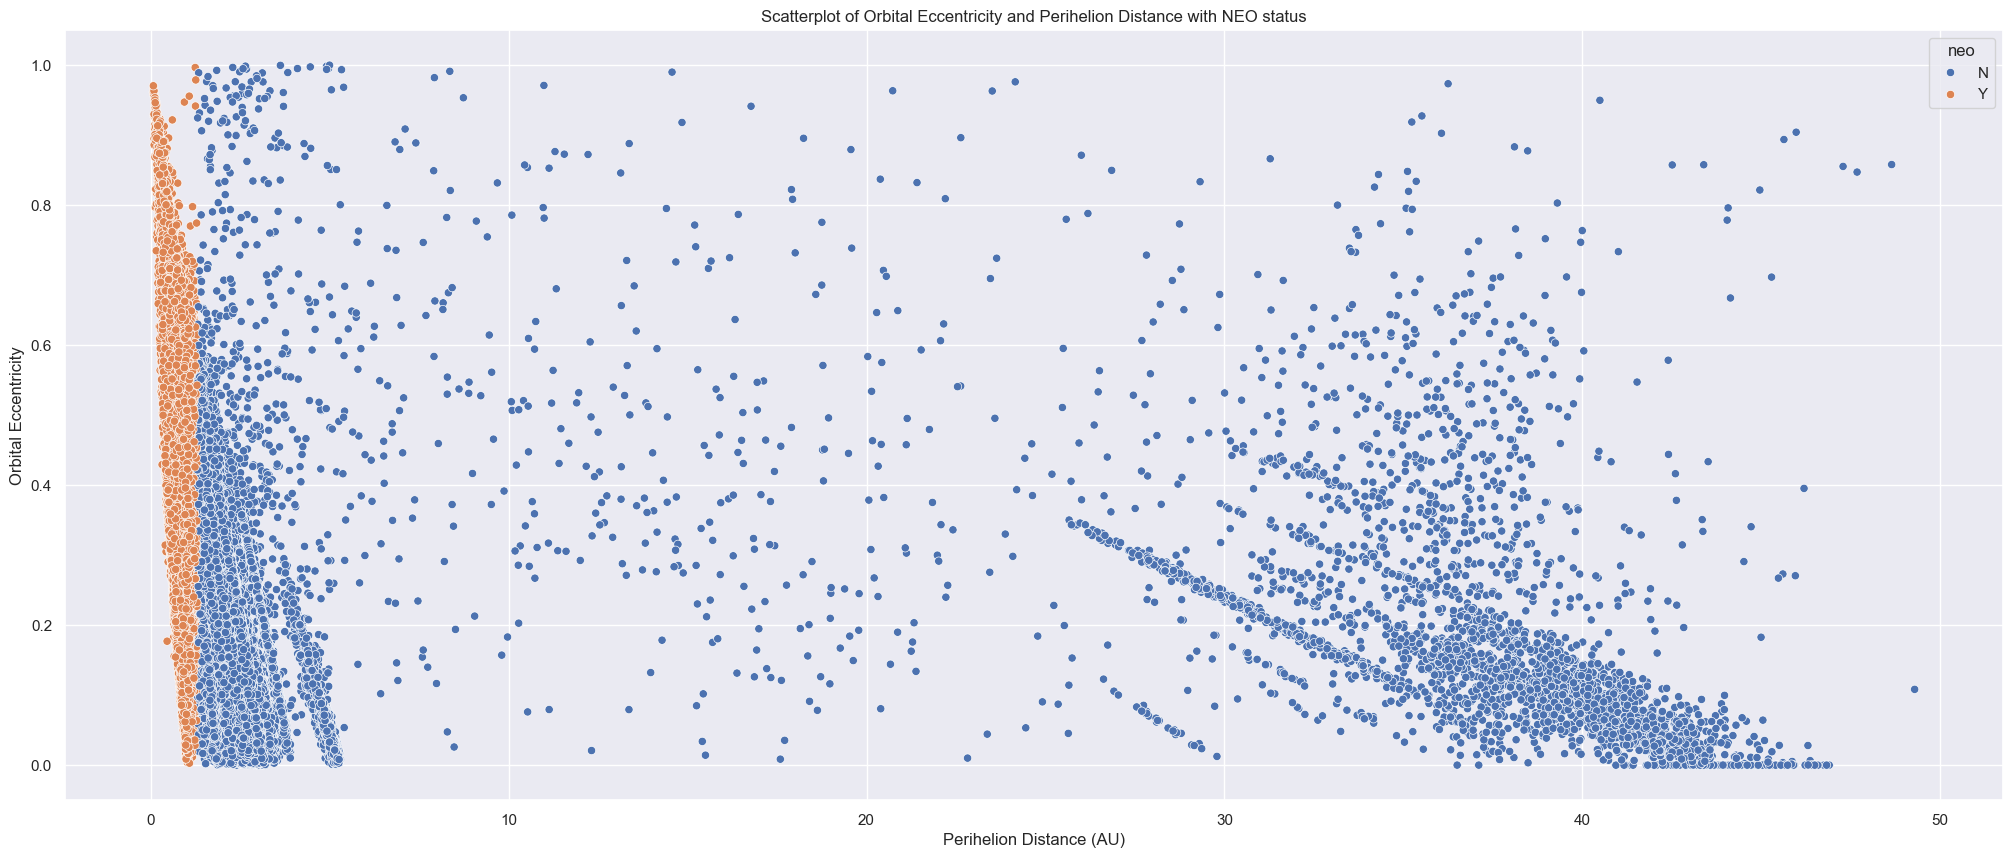

In [38]:
sns.scatterplot(x="q", y="e", hue="neo", data=asteroids_clean)
plt.xlabel("Perihelion Distance (AU)")
plt.ylabel("Orbital Eccentricity")
plt.title("Scatterplot of Orbital Eccentricity and Perihelion Distance with NEO status")

As expected the scatterplot is generally all over the place but what stands out to me the must are that there seems to be "streaks" of data points in the plot that seem to have a linear, strong, negative relationship. These seem to appear at below 5 AU and above 25 AU perihelion distances. The points in the distances between are practically completely random with no substantial relationship to be found whatsoever which is also interesting. What is apparent is that an asteroid's neo status is definitely somewhat dependent on perihelion distance and not orbit eccentricity. At low perihelion distances, neo asteroids of all orbital eccentricities can be found ranging from what looks like nearly zero (perfect circle) and almost one (extremely elliptical).

The data above looked really interesting so after seeing the very strange relationship between perihelion distance and orbital eccentricity I decided indicate orbital class with the hue of the point instead.

Text(0.5, 1.0, 'Scatterplot of Orbital Eccentricity and Perihelion Distance with Orbital Class')

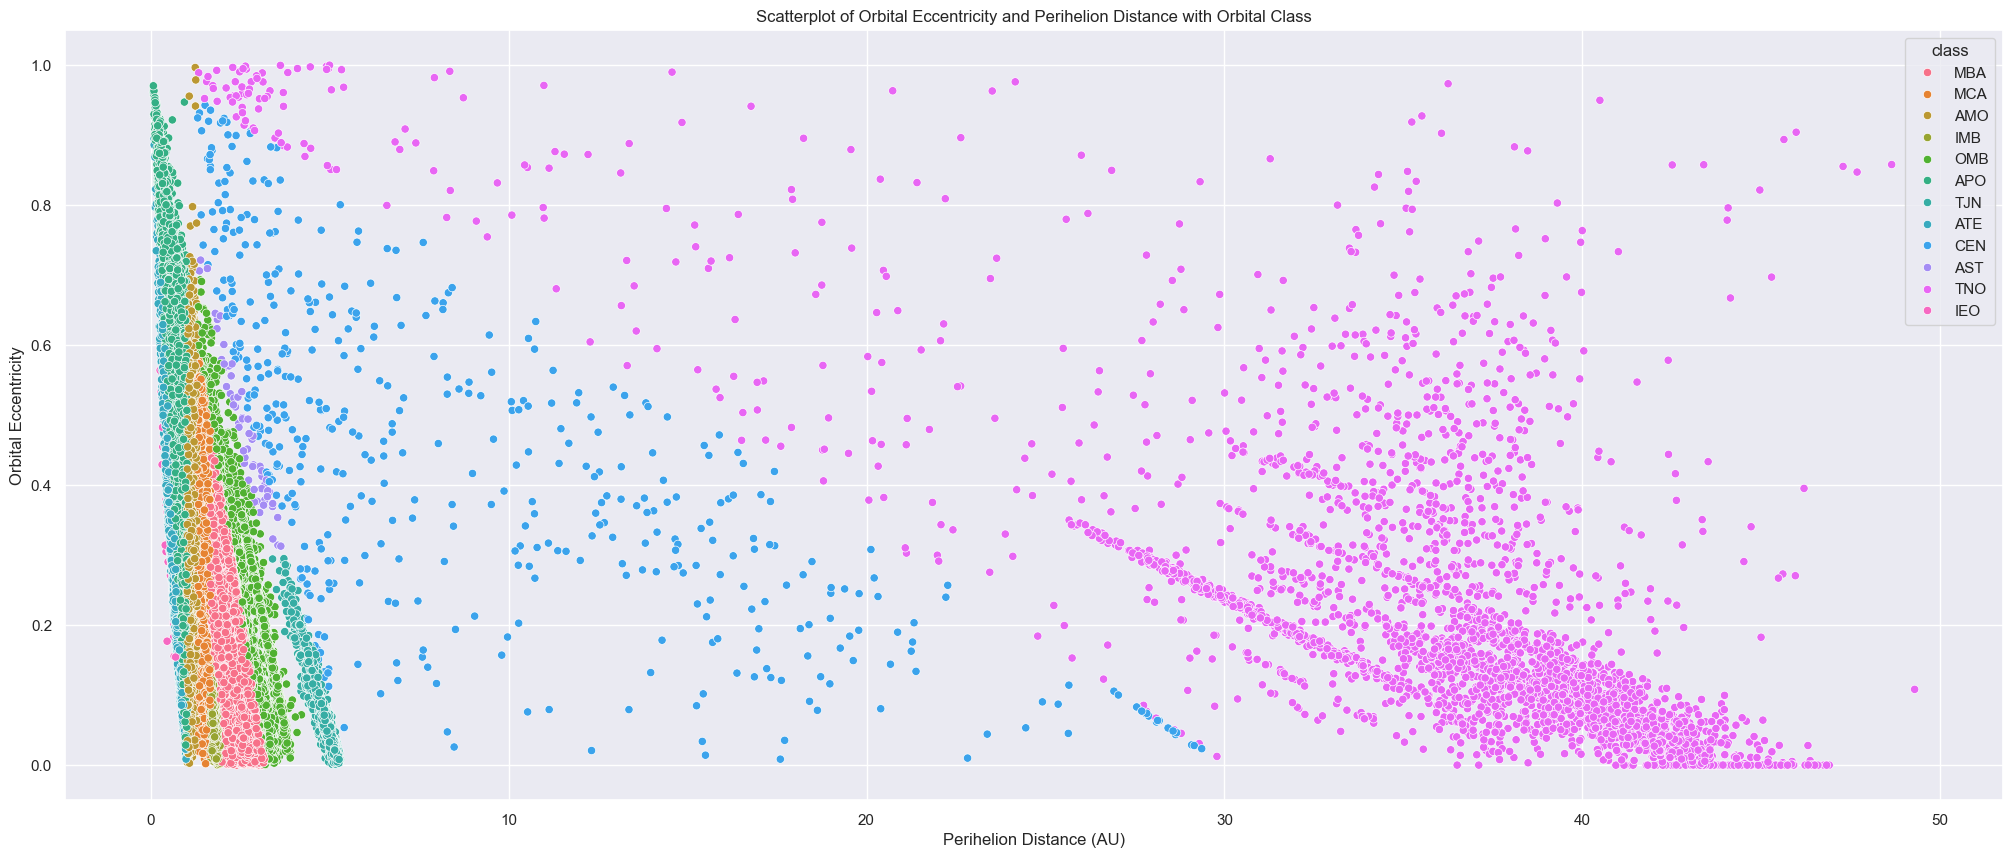

In [39]:
sns.scatterplot(x="q", y="e", hue="class", data=asteroids_clean)
plt.xlabel("Perihelion Distance (AU)")
plt.ylabel("Orbital Eccentricity")
plt.title("Scatterplot of Orbital Eccentricity and Perihelion Distance with Orbital Class")

The scatterplot is very interesting and using orbital class instead of neo status seems to reveal more about the relationship between orbital eccentricity and perihelion distance. It seems that orbital asteroid class can be determined from orbital eccentricity and perihelion distance. The TNOs cover the largest portion of the graph, ranging from low perihelion distance and high eccentricity to high perihelion distance and low eccentricity. This does make sense as TNOs can get really close to the Sun but still travel past Neptune's orbit because its orbit is very elliptical or they can orbit far away from the Sun and remain far from the Sun because it's orbit is more circular. The TNO, CEN, TJN, and AST class asteroids are the easiest to identify because their portions of the graph are fairly easier to identify. Once you get to the orbital classes with lower perihelion distances, it gets a little murky and the boundaries get a little harder to distinguish because there are just so many data points in that small area of the graph. Even though it's a little hard to determine at this scale, the remaining orbital classes can be essentially grouped into streaks in the graph with somewhat defined orbital eccentricities and perihelion distances. It's also interesting how TNO and CEN class asteroids cover a larger portion of the scatterplot which results in a large variability among asteroid characteristics within those classes.

## 5. Conclusion

To summarize the project, I took a dataset from Kaggle which was originally maintained by NASA's Jet Propulsion Laboratory and cleaned the data using various methods and criteria before using it for some analysis. A relatively small proportion of the data was removed because characteristics about the asteroid were missing and others were removed because the recorded values were so extreme compared to the rest of the data that it interfered with visualization and analysis. In regards to my research questions, I found that phas had higher median absolute magnitudes than non-phas and that they didn't have a definitive effect on determining an asteroid's pha status. I also found that the median diameter of neos was lower than that of non-neos with diameter also not have a definitive effect on determining an asteroids neo status. On the contrary, moid and perihelion distance have a strong linear relationship and both those variables play a role in determining an asteroid's neo status. Absolute magnitude has a negative exponential relationship with diameter. The relationship between moid and absolute magnitude can be defined in two main clusters. The absolute magnitude distributions for the four neo class phas are relatively similar, but IEO/ATIs stand out the most of the four neo class asteroids. The absolute magnitude medians of asteroid orbit classes in the main asteroid belt and closer is in a higher range of absolute magnitudes than that of asteroid orbit classes near Jupiter and beyond. The relationship between orbital eccentricity and perhelion distance certainly is a strange one but it turns out that each orbital class can be defined visually using a portion of the graph.

As for limitations, not all identified asteroids are used in the dataset so we can't get any population parameters but I'm assuming that the cleaned dataset of over 900,000 asteroids is fairly representative of all asteroids identified thus far in regards to their characteristics. Another limitation is that the majority of the observations are missing diameter values so all analysis using the diameter variable will be less applicable to the population of identified asteroids. A personal limitation is that I'm unable to properly use all variables in the full original dataset due to my lack of knowledge. I only used 9 of the 45 variables in my analysis because those were some of the few variables that I could understand concecptually. Some challenges that I faced was getting the visualizations to look somewhat understandable because many initially had extreme values that dwarfed the rest of the distribution so you couldn't see what was going on. Aside from analyses using diameter, the conclusions from the rest of the analyses should be truthworthy and applicable to the population of identified asteroids. These conclusions could help astronomers and astrophysicists better identify potentially hazardous asteroids and classify orbital classes for new asteroids that are catalogued in the future. In regards to future work, more analysis could definitely be done with the multitude of other variables that I didn't use in this project and they could use the conclusions drawn from this project to create more informed and meaningful research questions to analyze.